### Problem 1: Machine Learning


You are hired by one of the leading news channels CNBE who wants to analyse recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

1.4 Apply Logistic Regression and LDA (linear discriminant analysis). (4 marks)
1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results. (4 marks)
1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting. (7 marks)
1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. 
    Final Model: Compare the models and write inference which model is best/optimized. (7 marks)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.model_selection import train_test_split,GridSearchCV, RepeatedStratifiedKFold
from scipy.stats import zscore
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Machine Learning Models
from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis #LDA, QDA
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes
from sklearn.ensemble import RandomForestClassifier #Import Random Forest Model
from sklearn.tree import DecisionTreeClassifier  #Import Decision Tree
from sklearn.svm import SVC  #Import SVC
from sklearn.ensemble import BaggingClassifier #Bagging Classifier
from sklearn.ensemble import AdaBoostClassifier #ADA Boosting
from sklearn.ensemble import GradientBoostingClassifier #Gradient Boosting

In [3]:
el_df = pd.read_excel('Election_Data.xlsx', sheet_name= 'Election_Dataset_Two Classes').drop('Unnamed: 0',axis=1) #drop the unnamed column

In [28]:
el_df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [6]:
# clean up
    # duplicate, null values, outliers, ?, # .
    # categorical to numeric

**2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.**

In [4]:
#check the datatypes
el_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [71]:
#From the given data dictionary, we understood that except for age, all of the attributes mentioned as int64 are actually categoricl in nature, having certain levels
#This is why it is required to convert them to cateforical type or object type
el_df['economic.cond.national'] = el_df['economic.cond.national'].astype('object')
el_df['economic.cond.household'] = el_df['economic.cond.household'].astype('object')
el_df['Blair'] = el_df['Blair'].astype('object')
el_df['Hague'] = el_df['Hague'].astype('object')
el_df['Europe'] = el_df['Europe'].astype('object')
el_df['political.knowledge'] = el_df['political.knowledge'].astype('object')

In [42]:
#check the datatypes
el_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1517 non-null   object
 1   age                      1517 non-null   int64 
 2   economic.cond.national   1517 non-null   object
 3   economic.cond.household  1517 non-null   object
 4   Blair                    1517 non-null   object
 5   Hague                    1517 non-null   object
 6   Europe                   1517 non-null   object
 7   political.knowledge      1517 non-null   object
 8   gender                   1517 non-null   object
dtypes: int64(1), object(8)
memory usage: 150.8+ KB


In [41]:
#Check for the description
el_df.describe(include = 'all')

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
count,1517,1517.000000,1517.0,1517.0,1517.0,1517.0,1517.0,1517.0,1517
unique,2,NaN,5.0,5.0,5.0,5.0,11.0,4.0,2
top,Labour,NaN,3.0,3.0,4.0,2.0,11.0,2.0,female
freq,1057,NaN,604.0,645.0,833.0,617.0,338.0,776.0,808
mean,NaN,54.241266,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,15.701741,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,24.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,41.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,53.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,67.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
#Check for datatypes**
el_df.dtypes.value_counts()

object    8
int64     1
dtype: int64

In [6]:
#check the shape of the dataset
print('The no. of rows and the no. of columns of the dataset are {} and {} respectively '.format(el_df.shape[0],el_df.shape[1]))

The no. of rows and the no. of columns of the dataset are 1525 and 9 respectively 


In [14]:
#check for the null values
el_df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [7]:
#check for the duplicates
el_df.duplicated().sum()

8

In [8]:
print('The no. of duplicated records in the dataset is {} '.format(el_df.duplicated().sum()))

The no. of duplicated records in the dataset is 8 


In [4]:
#Drop the duplicates
el_df = el_df.drop_duplicates()

In [5]:
el_df.duplicated().sum()

0

####  Check for EDA

1.2) Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers (4 pts). Interpret the inferences for each (3 pts) Distribution plots(histogram) or similar plots for the continuous columns. Box plots, Correlation plots. Appropriate plots for categorical variables. Inferences on each plot. Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.

In [7]:
cat = el_df.dtypes[el_df.dtypes=='object'].index
num = el_df.dtypes[el_df.dtypes!='object'].index

In [46]:
for i in cat:
    print (i)
    print(el_df[i].value_counts(normalize = True).round(2)*100)
    print("--------------------")

vote
Labour          70.0
Conservative    30.0
Name: vote, dtype: float64
--------------------
economic.cond.national
3    40.0
4    35.0
2    17.0
5     5.0
1     2.0
Name: economic.cond.national, dtype: float64
--------------------
economic.cond.household
3    43.0
4    29.0
2    18.0
5     6.0
1     4.0
Name: economic.cond.household, dtype: float64
--------------------
Blair
4    55.0
2    29.0
5    10.0
1     6.0
3     0.0
Name: Blair, dtype: float64
--------------------
Hague
2    41.0
4    37.0
1    15.0
5     5.0
3     2.0
Name: Hague, dtype: float64
--------------------
Europe
11    22.0
6     14.0
3      8.0
4      8.0
5      8.0
8      7.0
9      7.0
1      7.0
10     7.0
7      6.0
2      5.0
Name: Europe, dtype: float64
--------------------
political.knowledge
2    51.0
0    30.0
3    16.0
1     3.0
Name: political.knowledge, dtype: float64
--------------------
gender
female    53.0
male      47.0
Name: gender, dtype: float64
--------------------


In [47]:
#value counts for each category- Vote
el_df['vote'].value_counts()

Labour          1057
Conservative     460
Name: vote, dtype: int64

In [48]:
#value counts for each category- Gender
el_df['gender'].value_counts()

female    808
male      709
Name: gender, dtype: int64

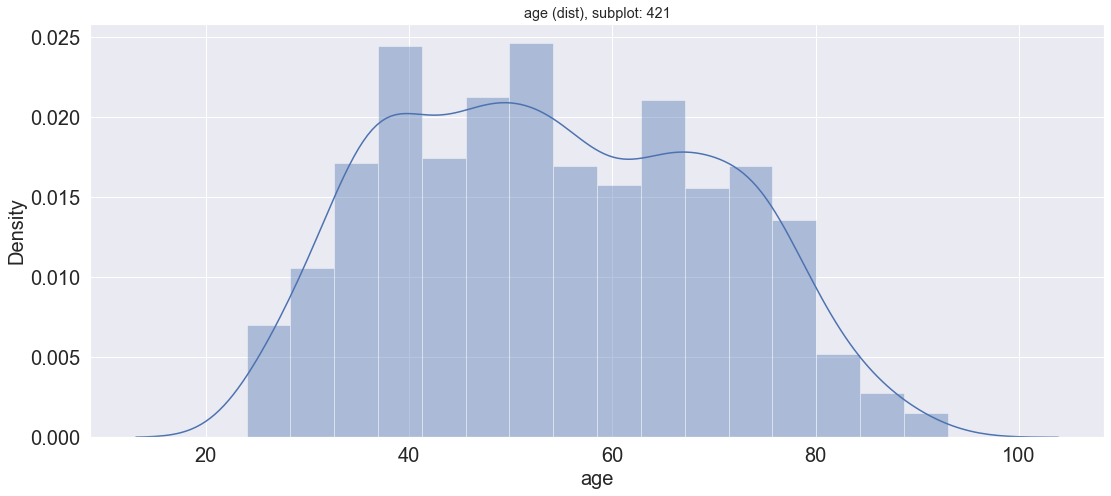

In [49]:
#Check for Distribution plots(histogram)
#fig, ax = plt.subplots(figsize=(30, 25))
fig = plt.figure(figsize=(40,35))
c = 1
for i in num:
    plt.subplot(4, 2, c)
    plt.title('{} (dist), subplot: {}{}{}'.format(i, 4, 2, c))
    plt.xlabel(i, fontsize=20)
    plt.ylabel('Density',fontsize=20)
    sns.distplot(el_df[i])
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.rcParams.update({'font.size': 20})
    c = c + 1

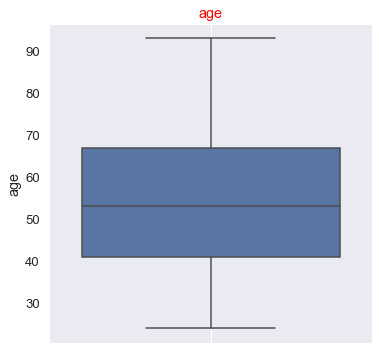

In [50]:
#**Check for Box plots, Correlation plots for the continuous columns**
data_plot=el_df[num]
fig=plt.figure(figsize=(20,10))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(2,4,i+1)
    sns.boxplot(y=data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Red')
    plt.grid()
plt.tight_layout()

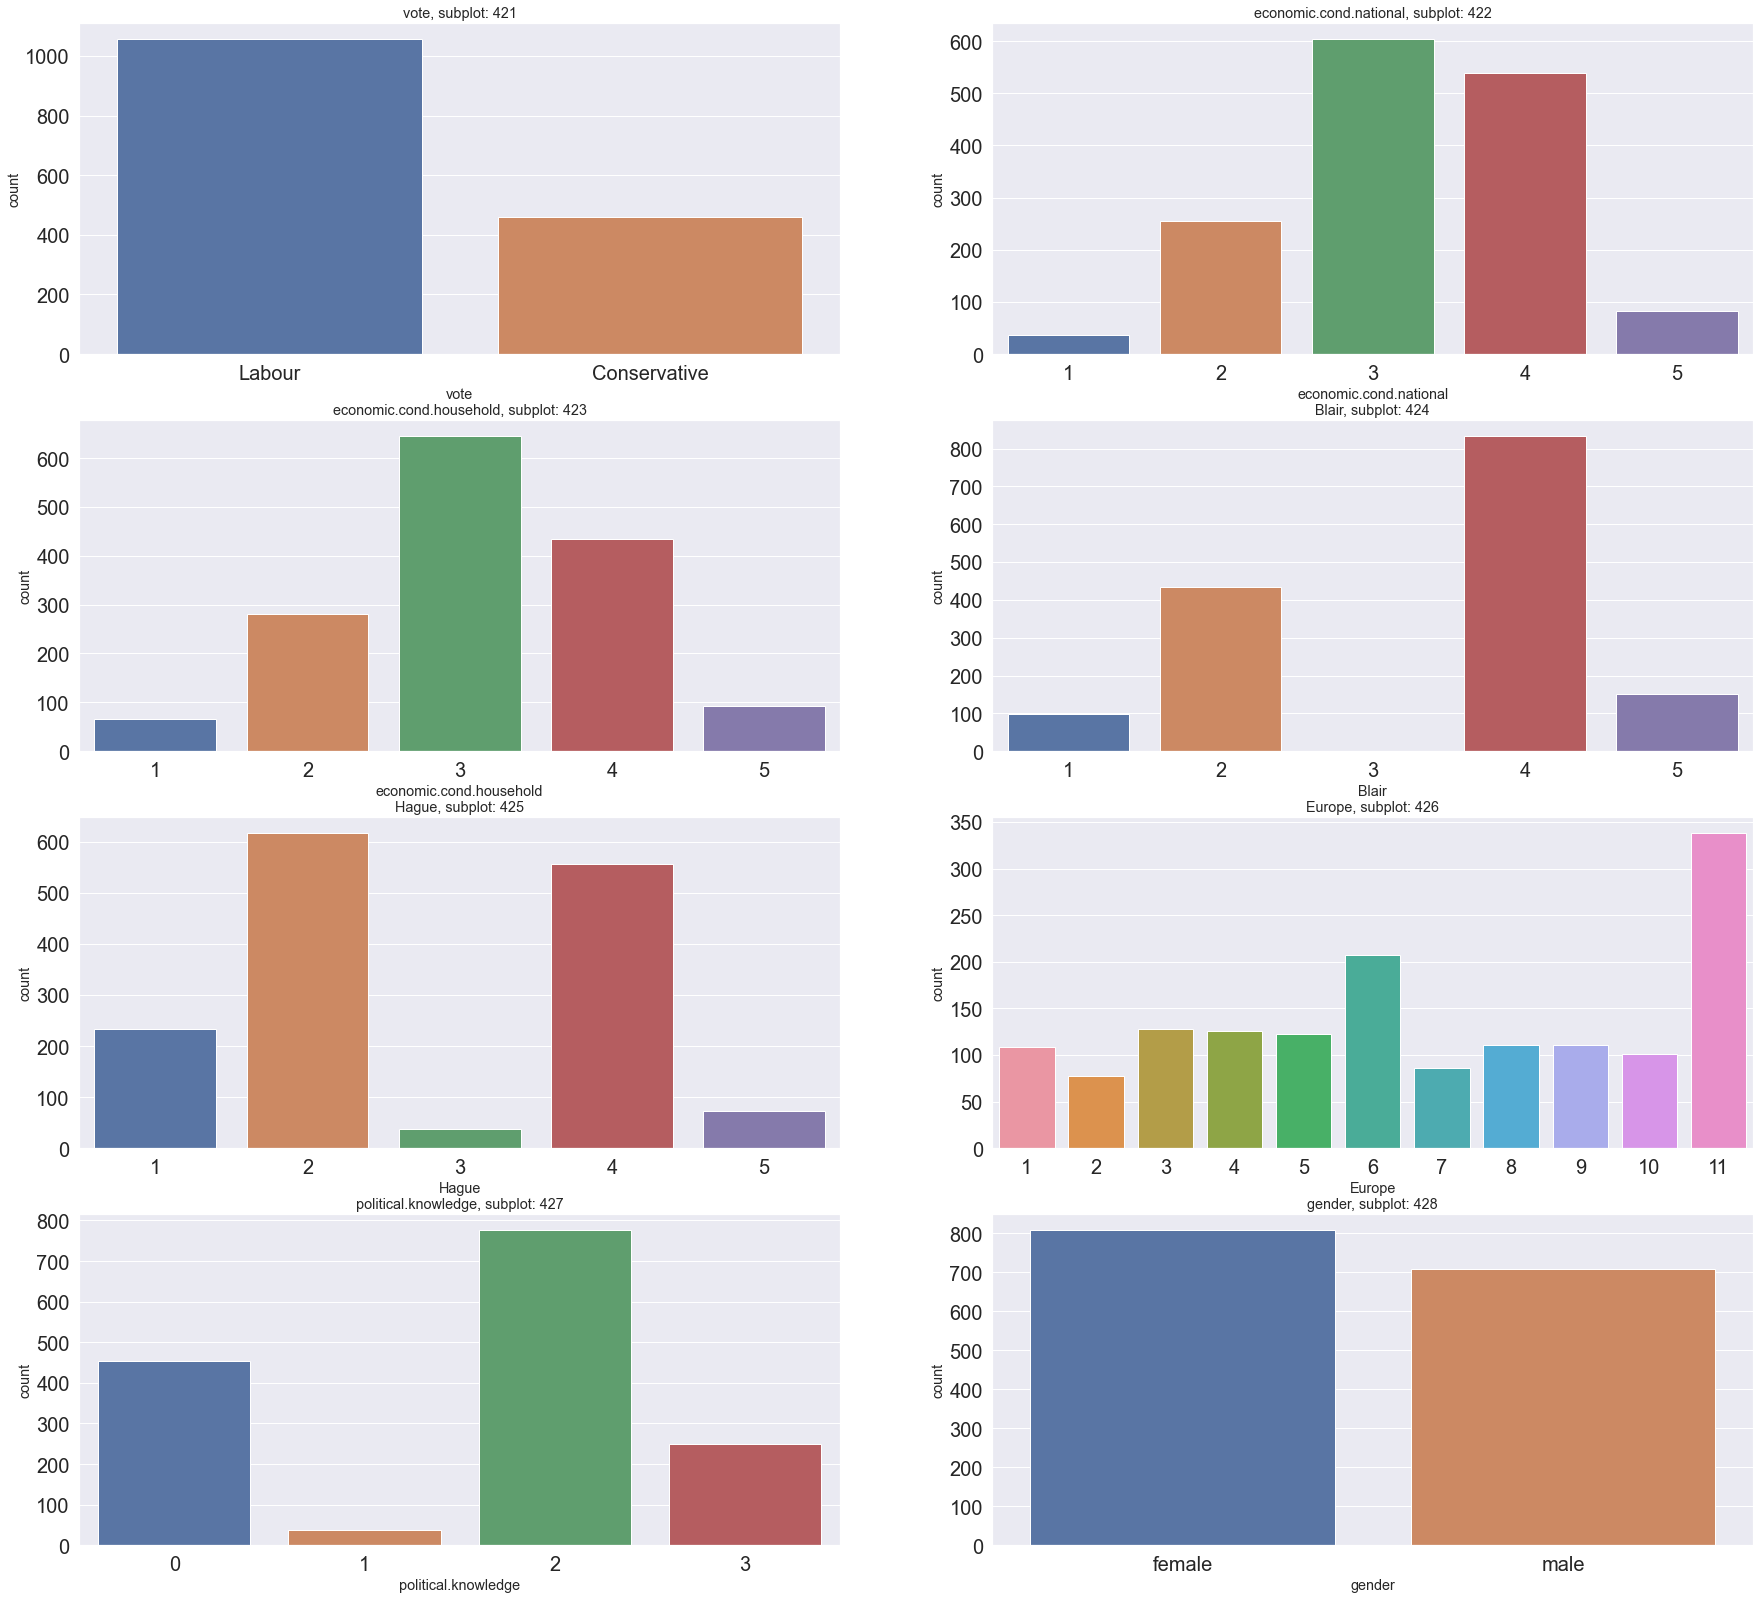

In [56]:
#Check for Count plots(barplots)  
fig = plt.figure(figsize=(30,28))
c = 1
for i in cat:
    plt.subplot(4, 2, c)
    plt.title('{}, subplot: {}{}{}'.format(i, 4, 2, c))
    plt.xlabel(i)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    sns.countplot(el_df[i])
    plt.rcParams.update({'font.size': 25})
    c = c + 1

plt.show()

<AxesSubplot:>

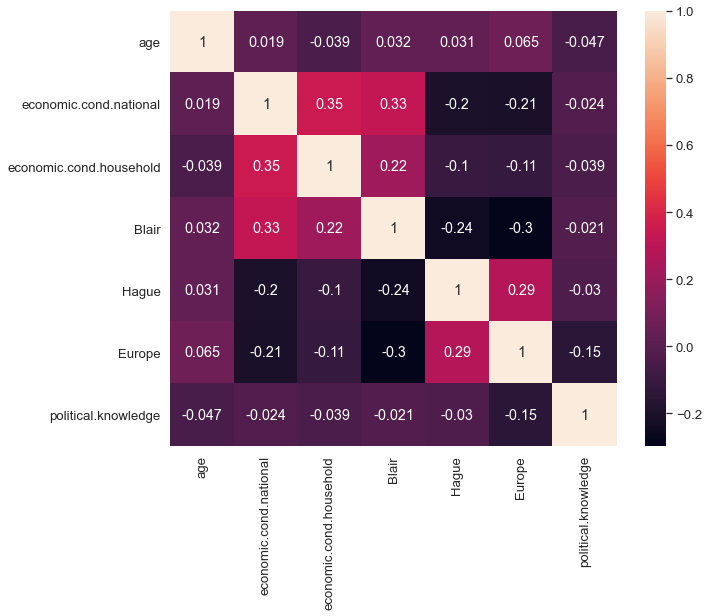

In [30]:
# construct heatmap with only continuous variables
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(el_df[num].corr(),annot = True)

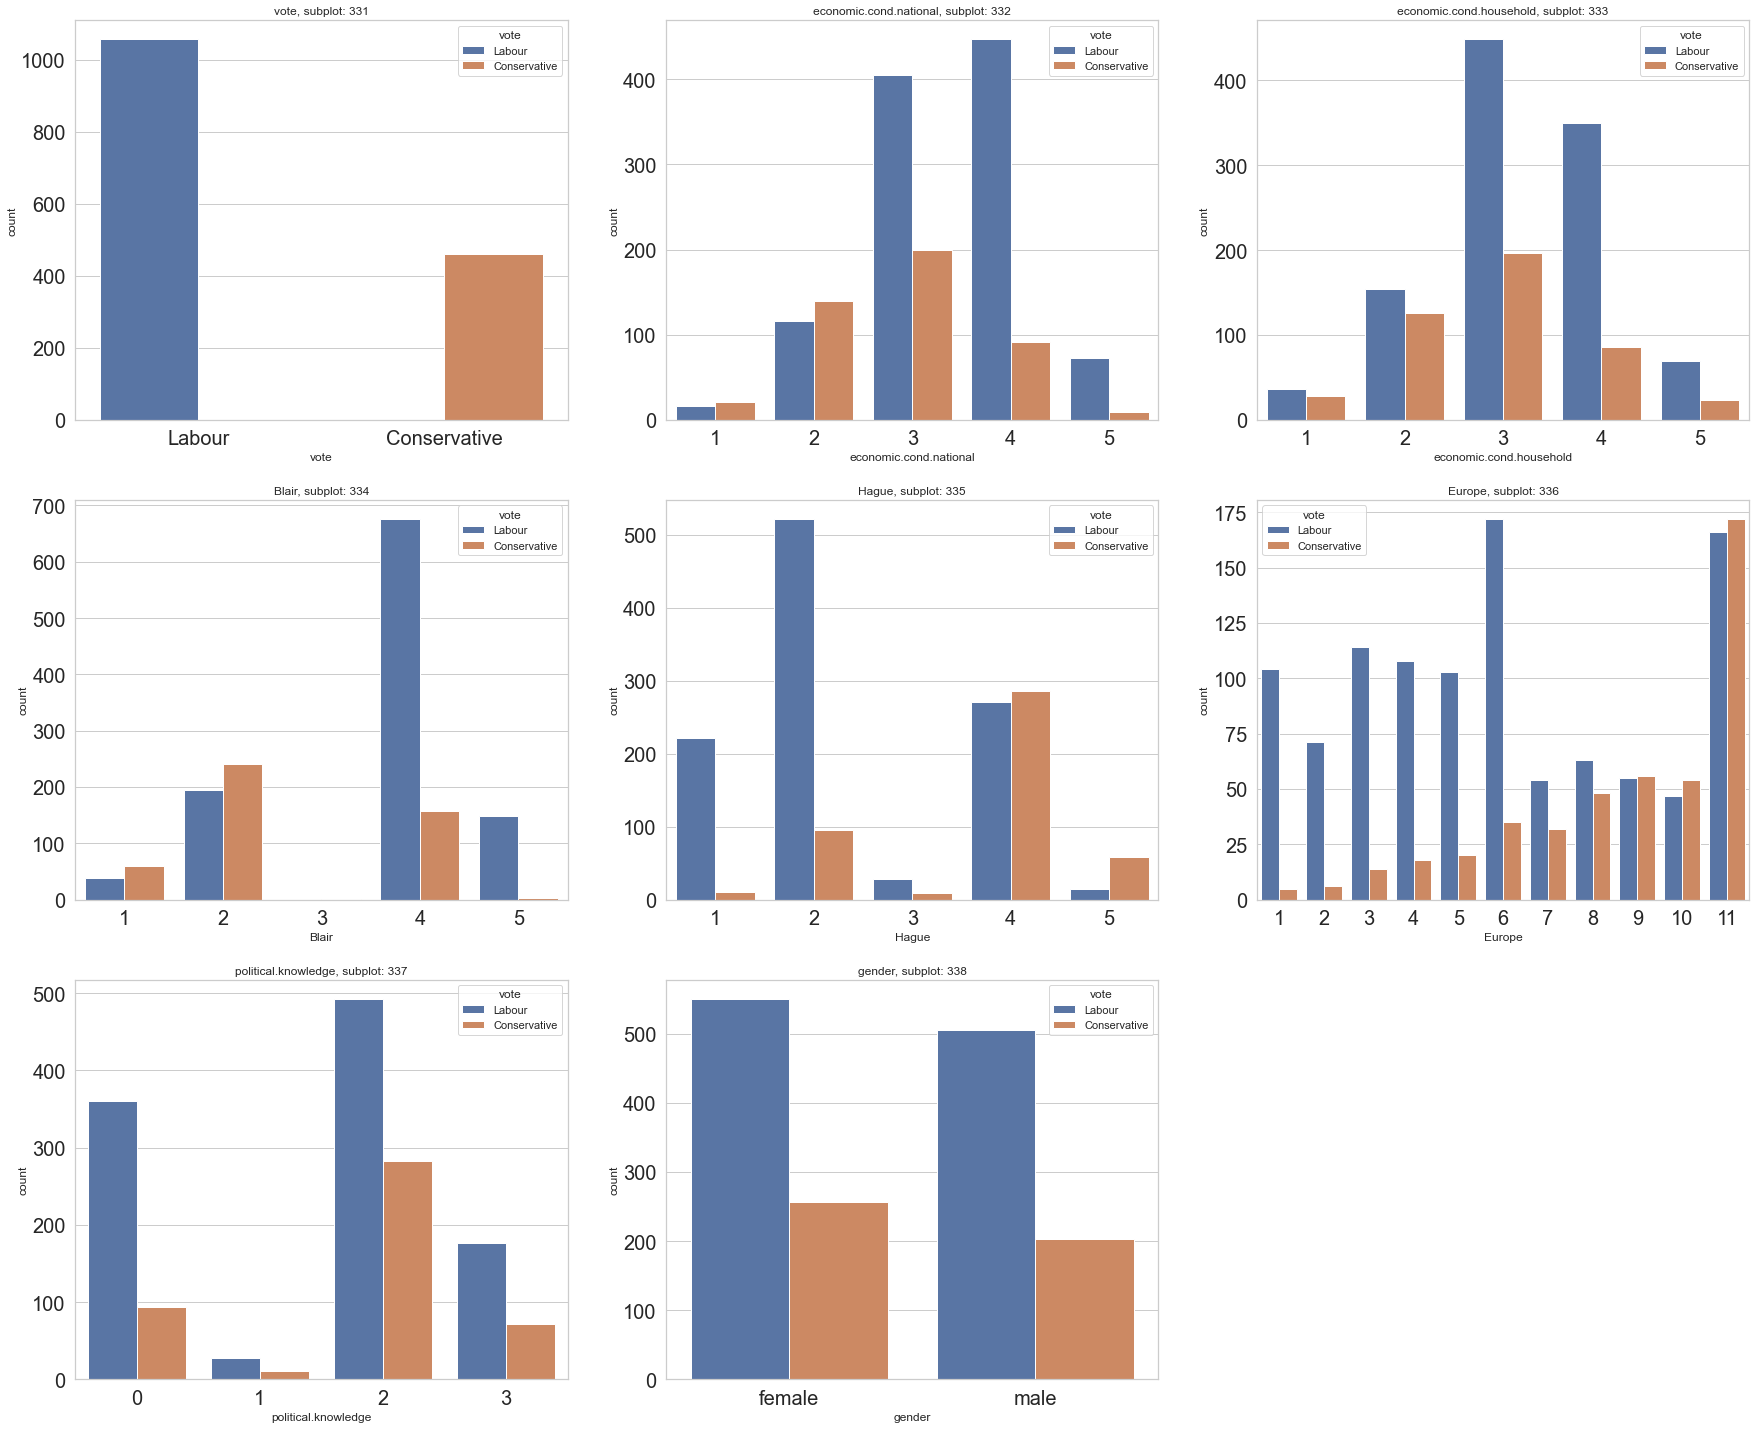

In [23]:
#bivariate plot-vote
fig = plt.figure(figsize=(30,25))
c = 1
for i in cat:
    plt.subplot(3, 3, c)
    plt.title('{}, subplot: {}{}{}'.format(i, 3, 3, c))
    plt.xlabel(i)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    #sns.barplot(el_df[i],el_df['age'])
    sns.countplot(x= el_df[i], data=el_df, hue = "vote")
    plt.rcParams.update({'font.size': 20})
    c = c + 1

plt.show()

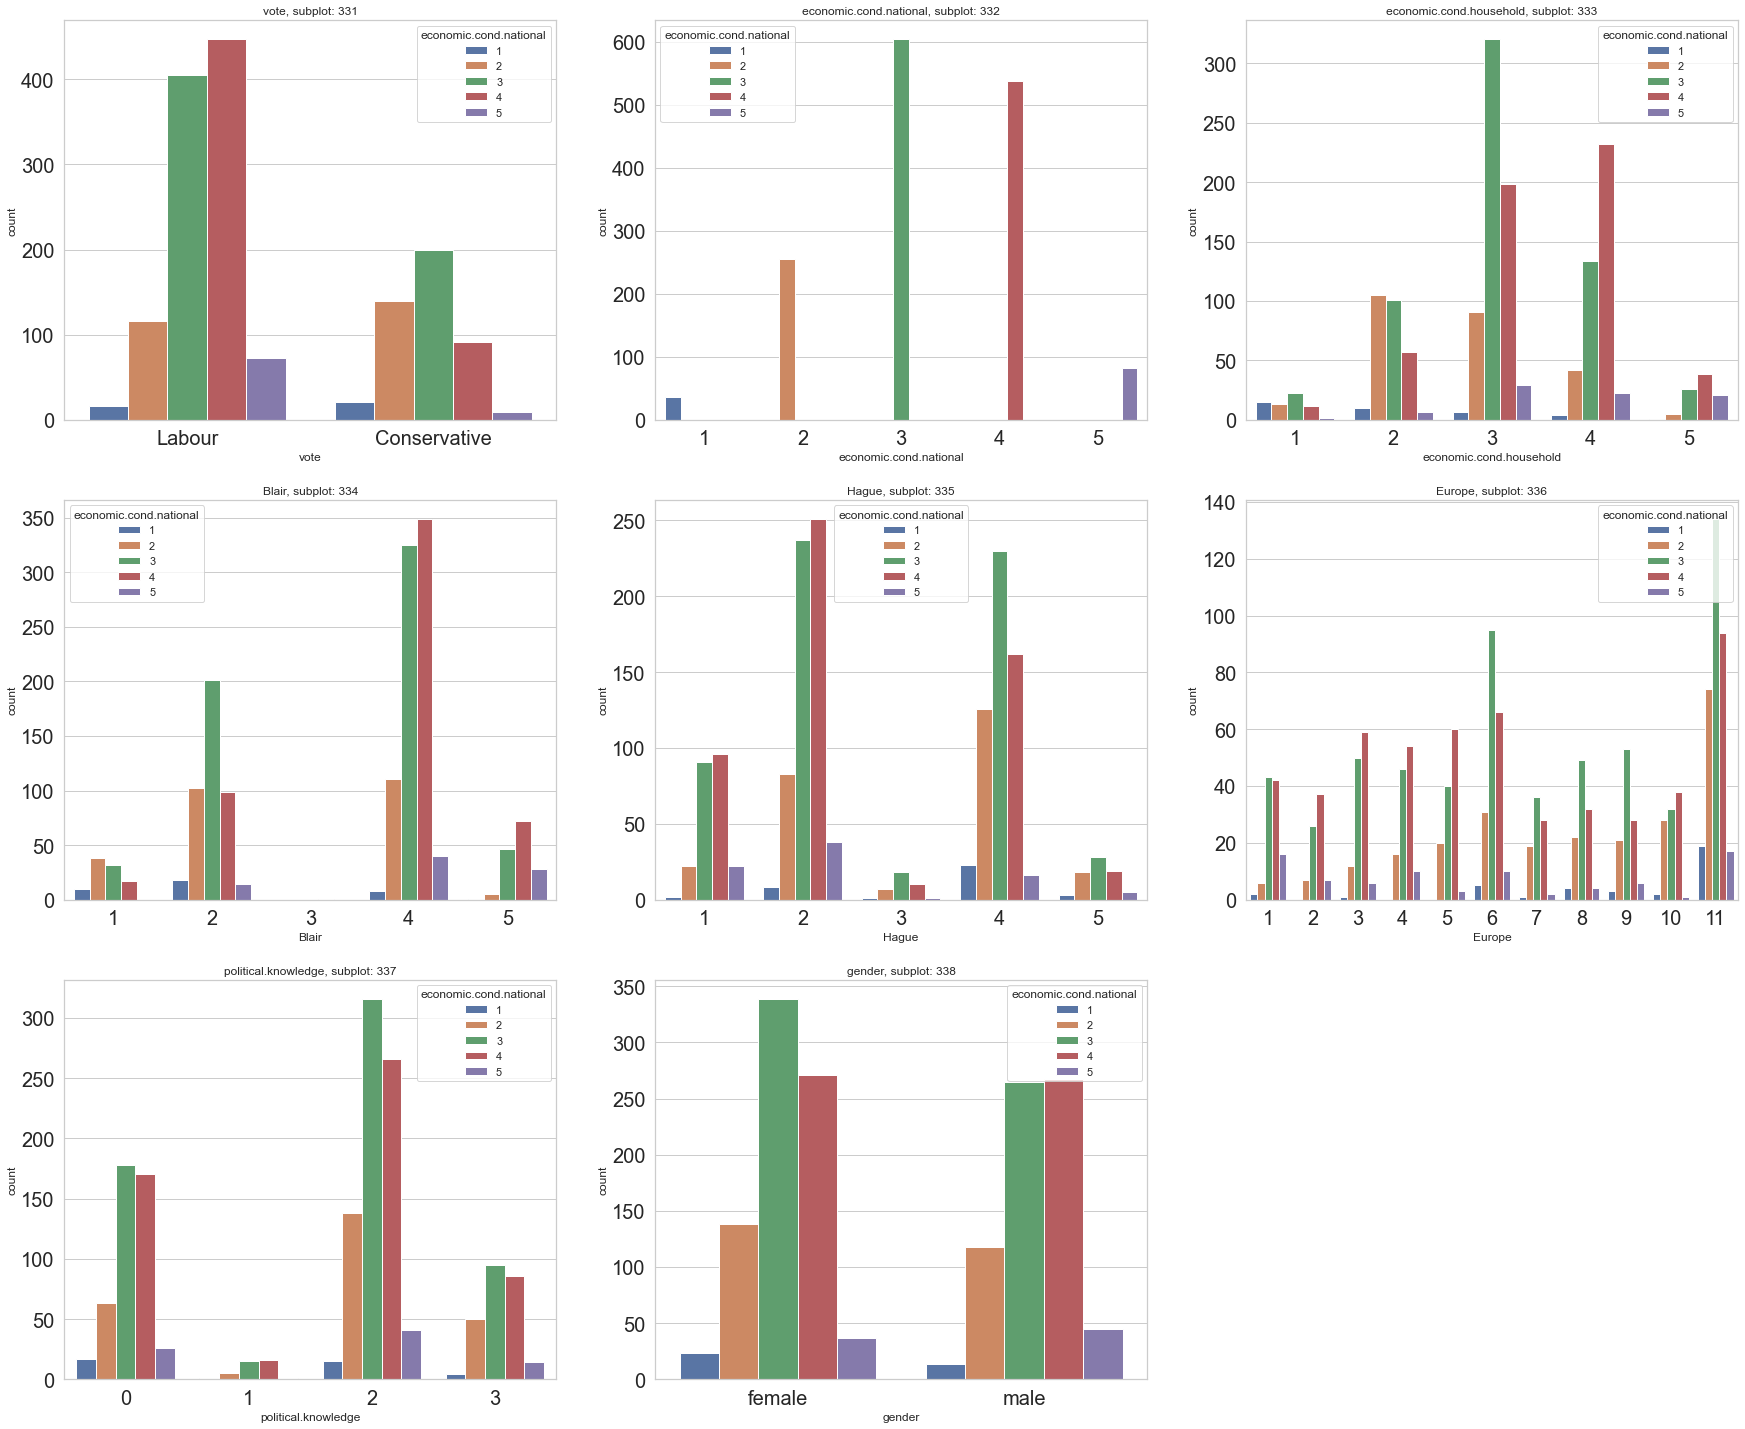

In [8]:
#bivariate plot-economic.cond.national
fig = plt.figure(figsize=(30,25))
c = 1
for i in cat:
    plt.subplot(3, 3, c)
    plt.title('{}, subplot: {}{}{}'.format(i, 3, 3, c))
    plt.xlabel(i)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    #sns.barplot(el_df[i],el_df['age'])
    sns.countplot(x= el_df[i], data=el_df, hue = "economic.cond.national")
    plt.rcParams.update({'font.size': 20})
    c = c + 1

plt.show()

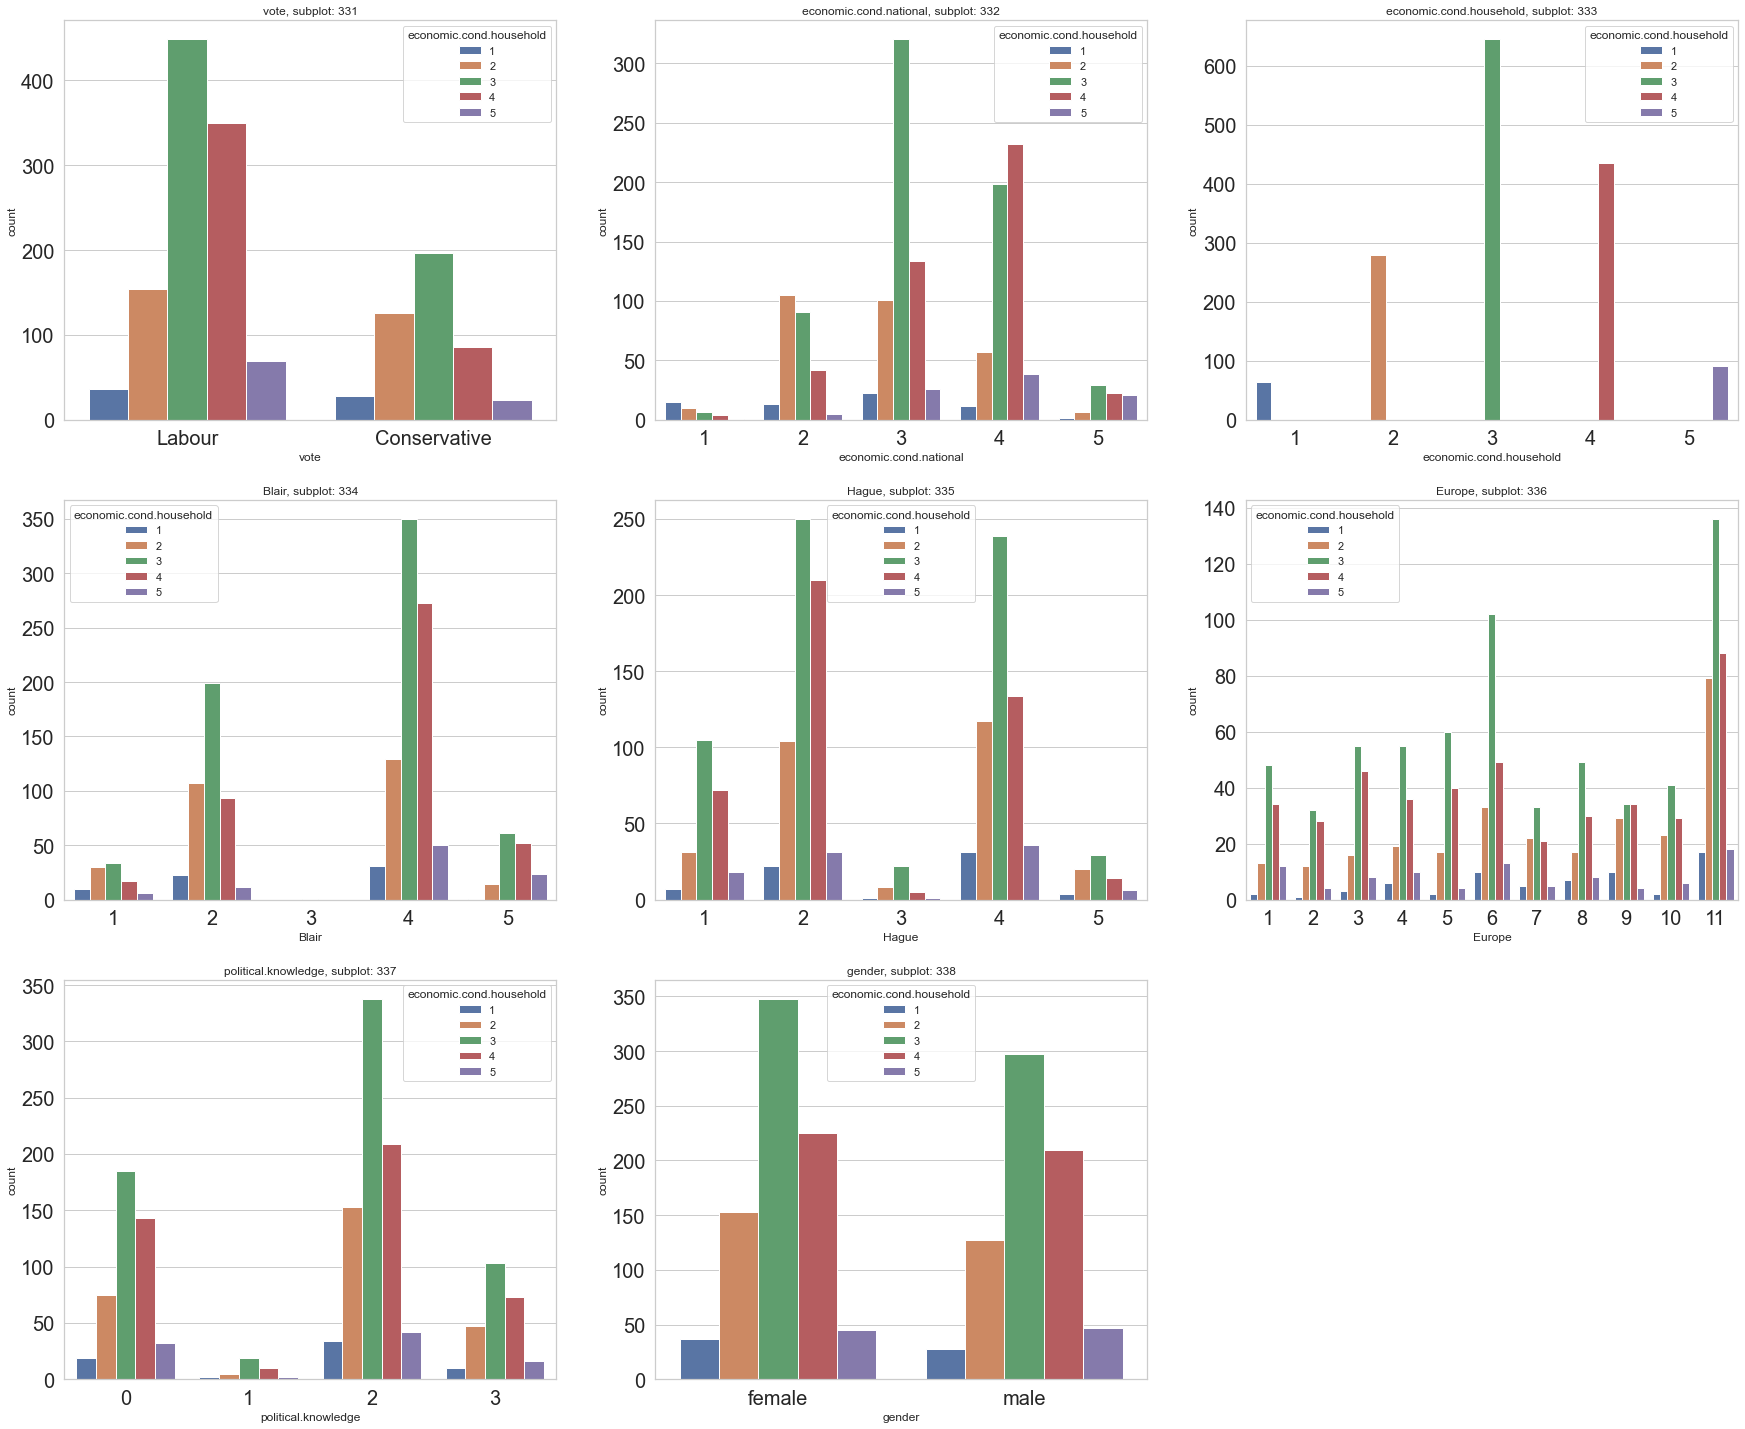

In [9]:
#bivariate plot-economic.cond.household
fig = plt.figure(figsize=(30,25))
c = 1
for i in cat:
    plt.subplot(3, 3, c)
    plt.title('{}, subplot: {}{}{}'.format(i, 3, 3, c))
    plt.xlabel(i)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    #sns.barplot(el_df[i],el_df['age'])
    sns.countplot(x= el_df[i], data=el_df, hue = "economic.cond.household")
    plt.rcParams.update({'font.size': 20})
    c = c + 1

plt.show()

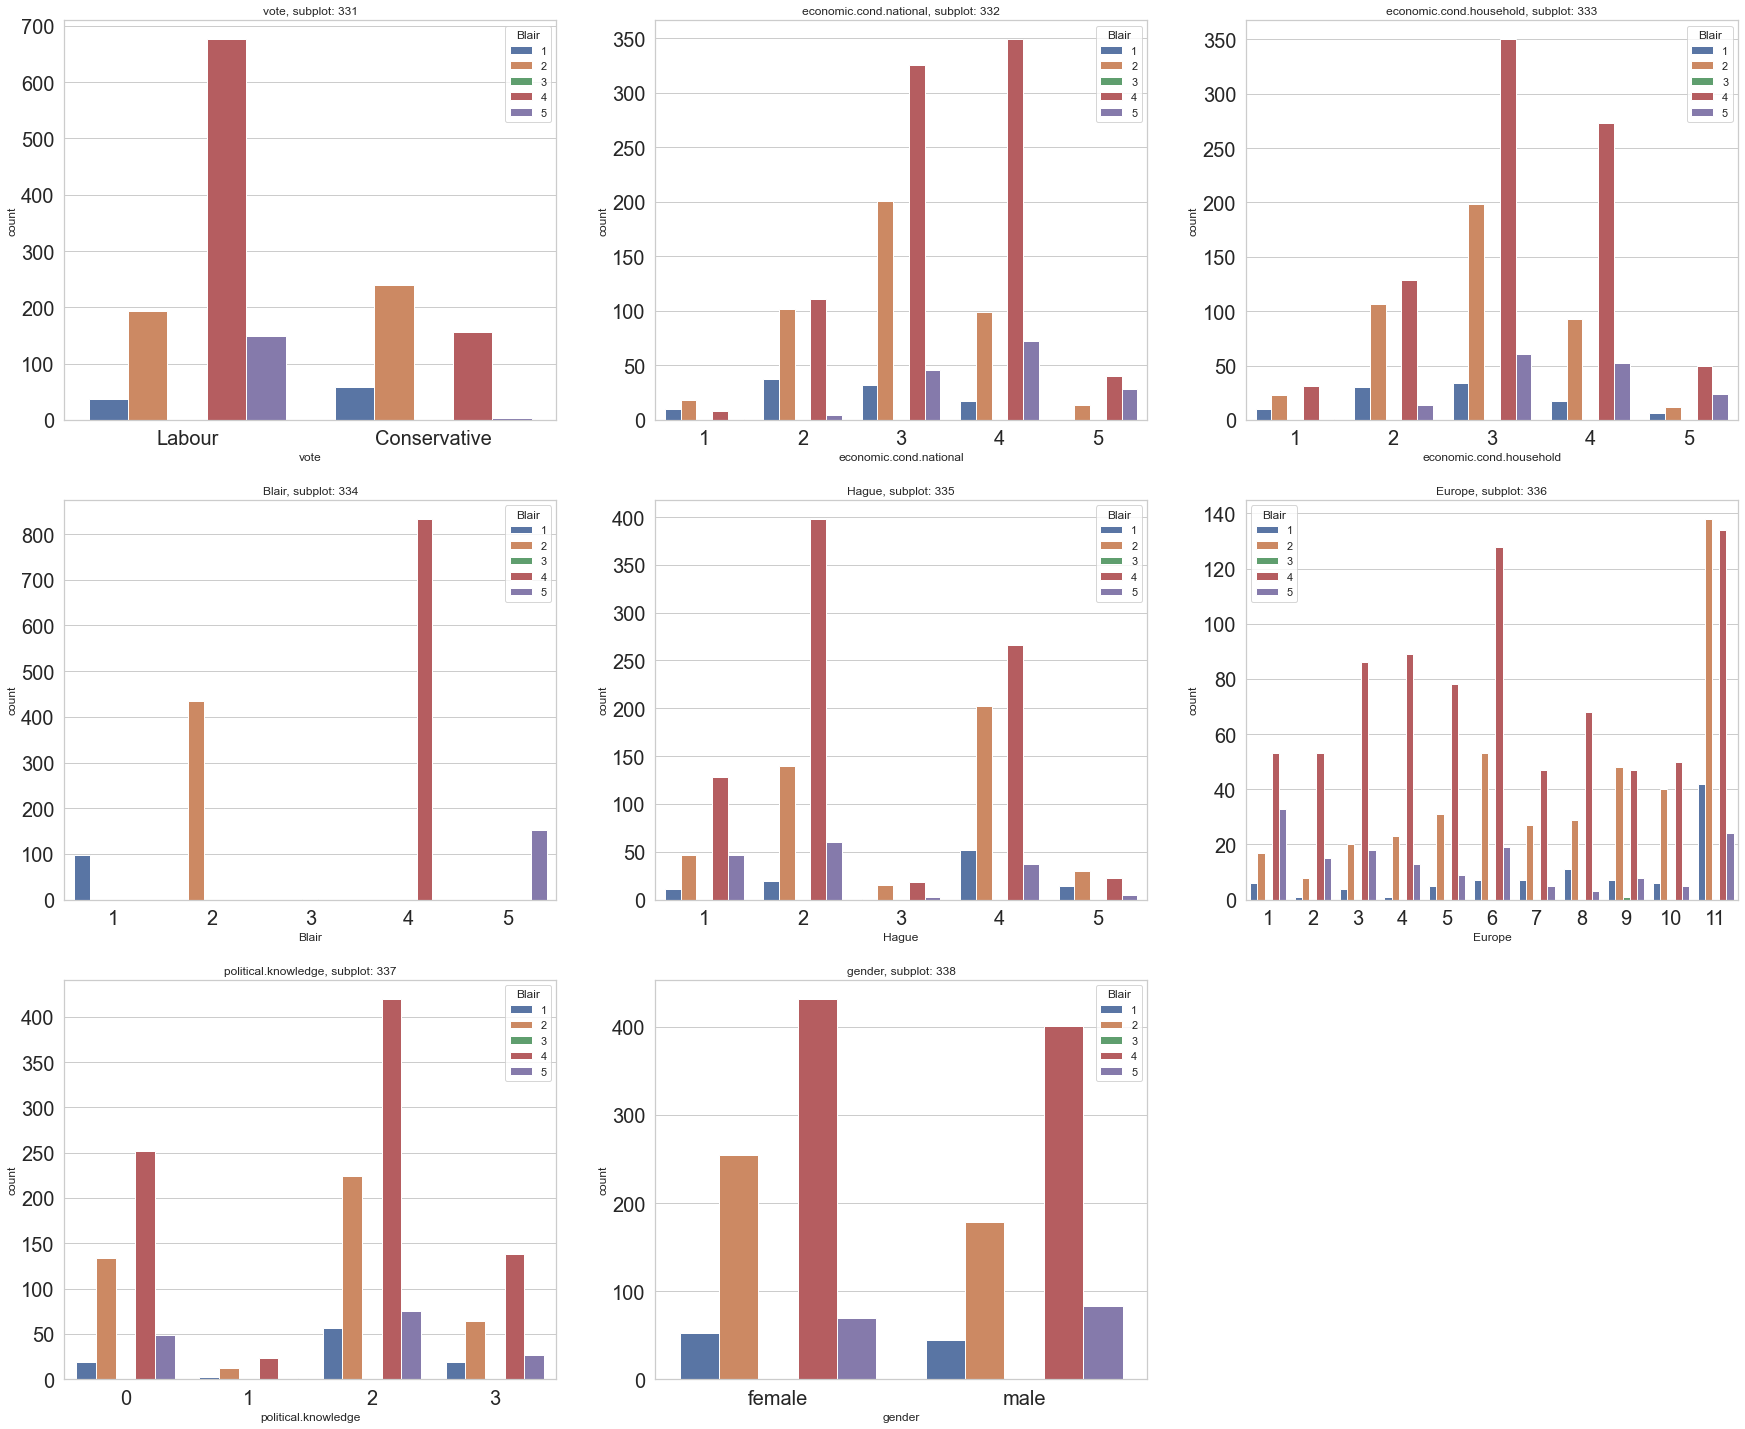

In [10]:
#bivariate plot-Blair
fig = plt.figure(figsize=(30,25))
c = 1
for i in cat:
    plt.subplot(3, 3, c)
    plt.title('{}, subplot: {}{}{}'.format(i, 3, 3, c))
    plt.xlabel(i)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    #sns.barplot(el_df[i],el_df['age'])
    sns.countplot(x= el_df[i], data=el_df, hue = "Blair")
    plt.rcParams.update({'font.size': 20})
    c = c + 1

plt.show()

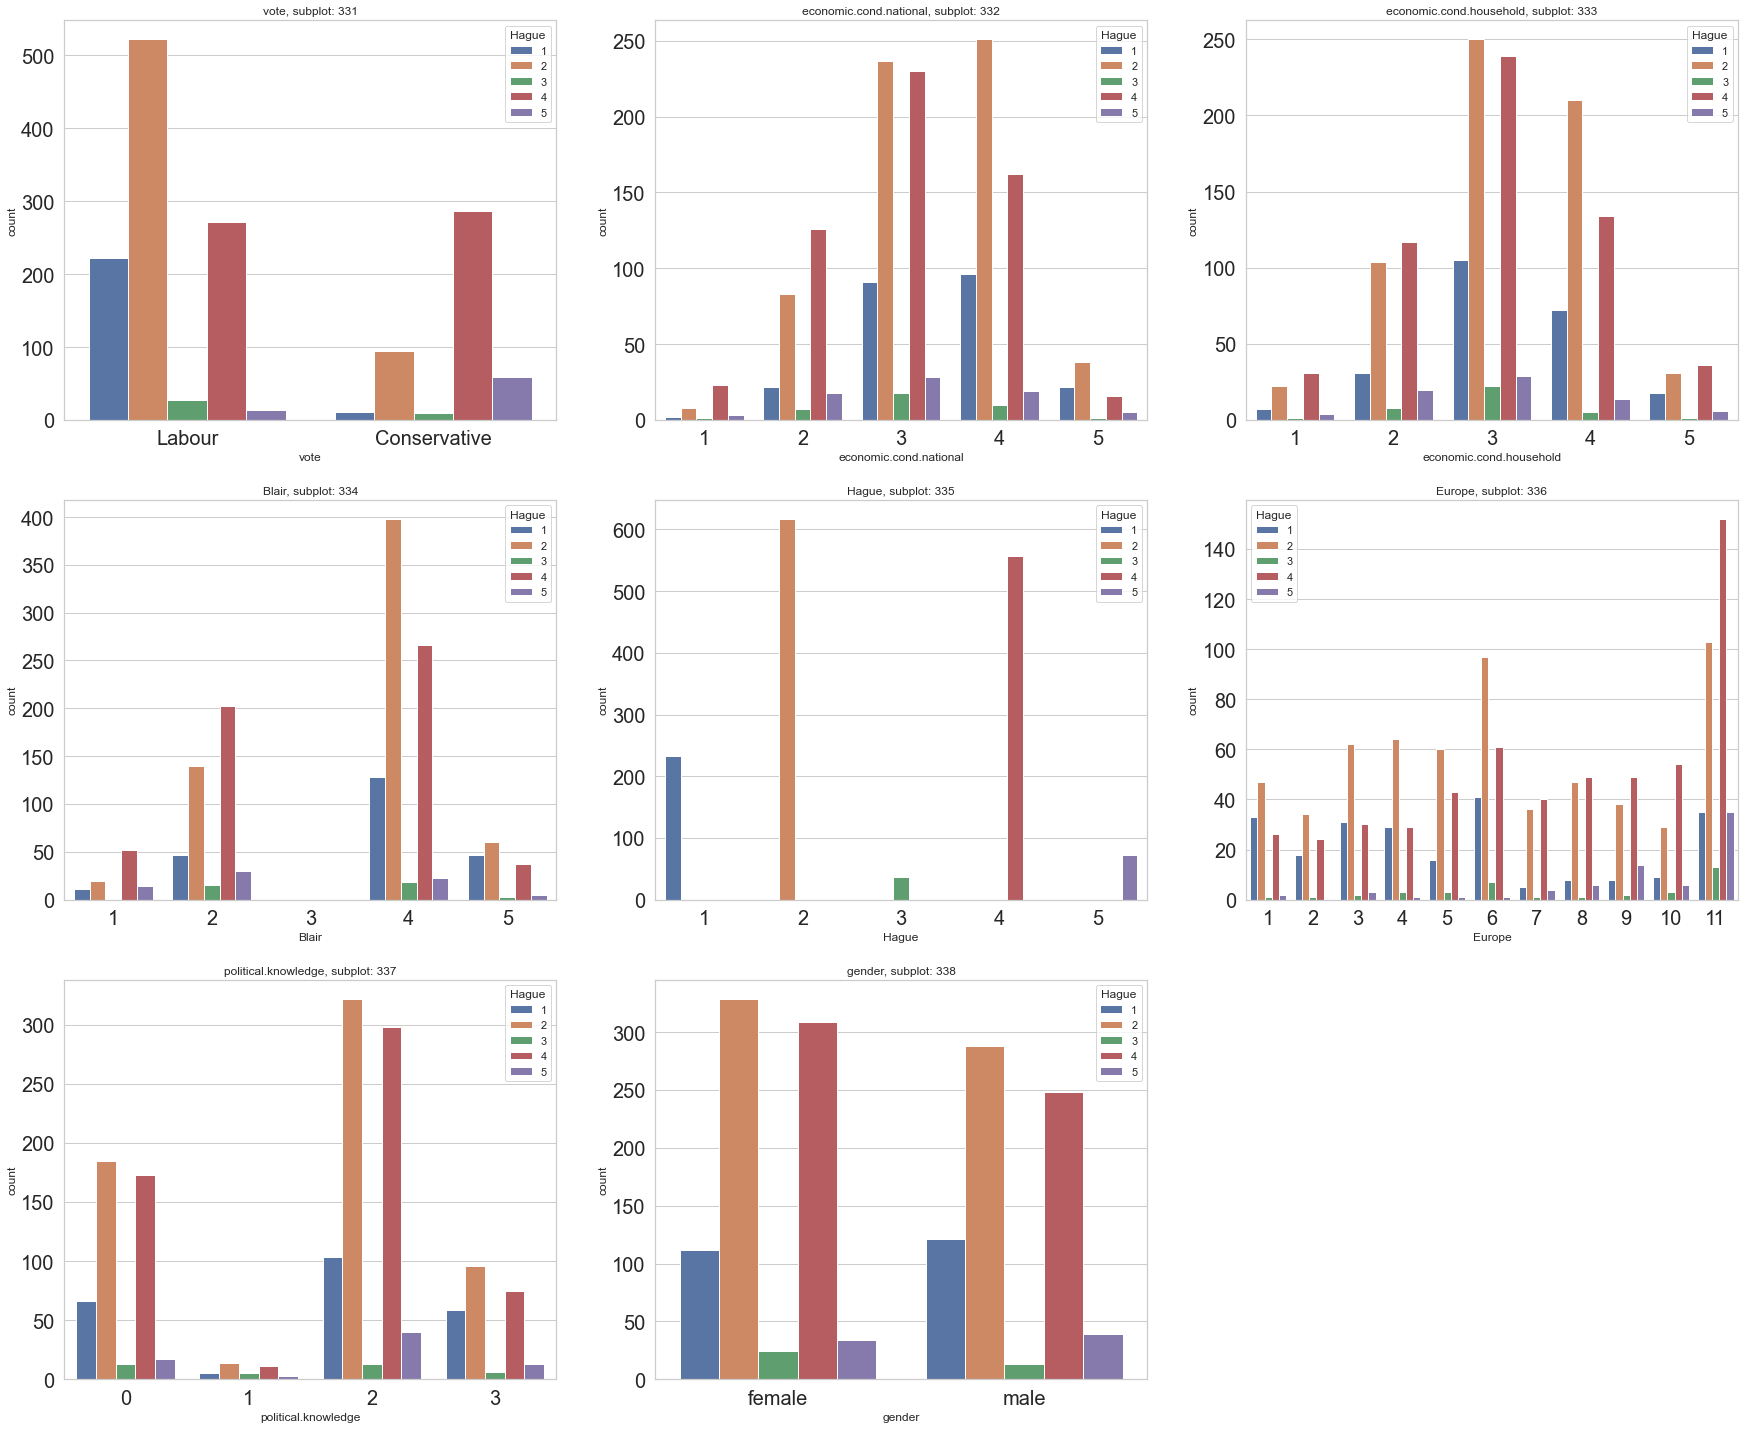

In [11]:
#bivariate plot-Hague
fig = plt.figure(figsize=(30,25))
c = 1
for i in cat:
    plt.subplot(3, 3, c)
    plt.title('{}, subplot: {}{}{}'.format(i, 3, 3, c))
    plt.xlabel(i)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    #sns.barplot(el_df[i],el_df['age'])
    sns.countplot(x= el_df[i], data=el_df, hue = "Hague")
    plt.rcParams.update({'font.size': 20})
    c = c + 1

plt.show()

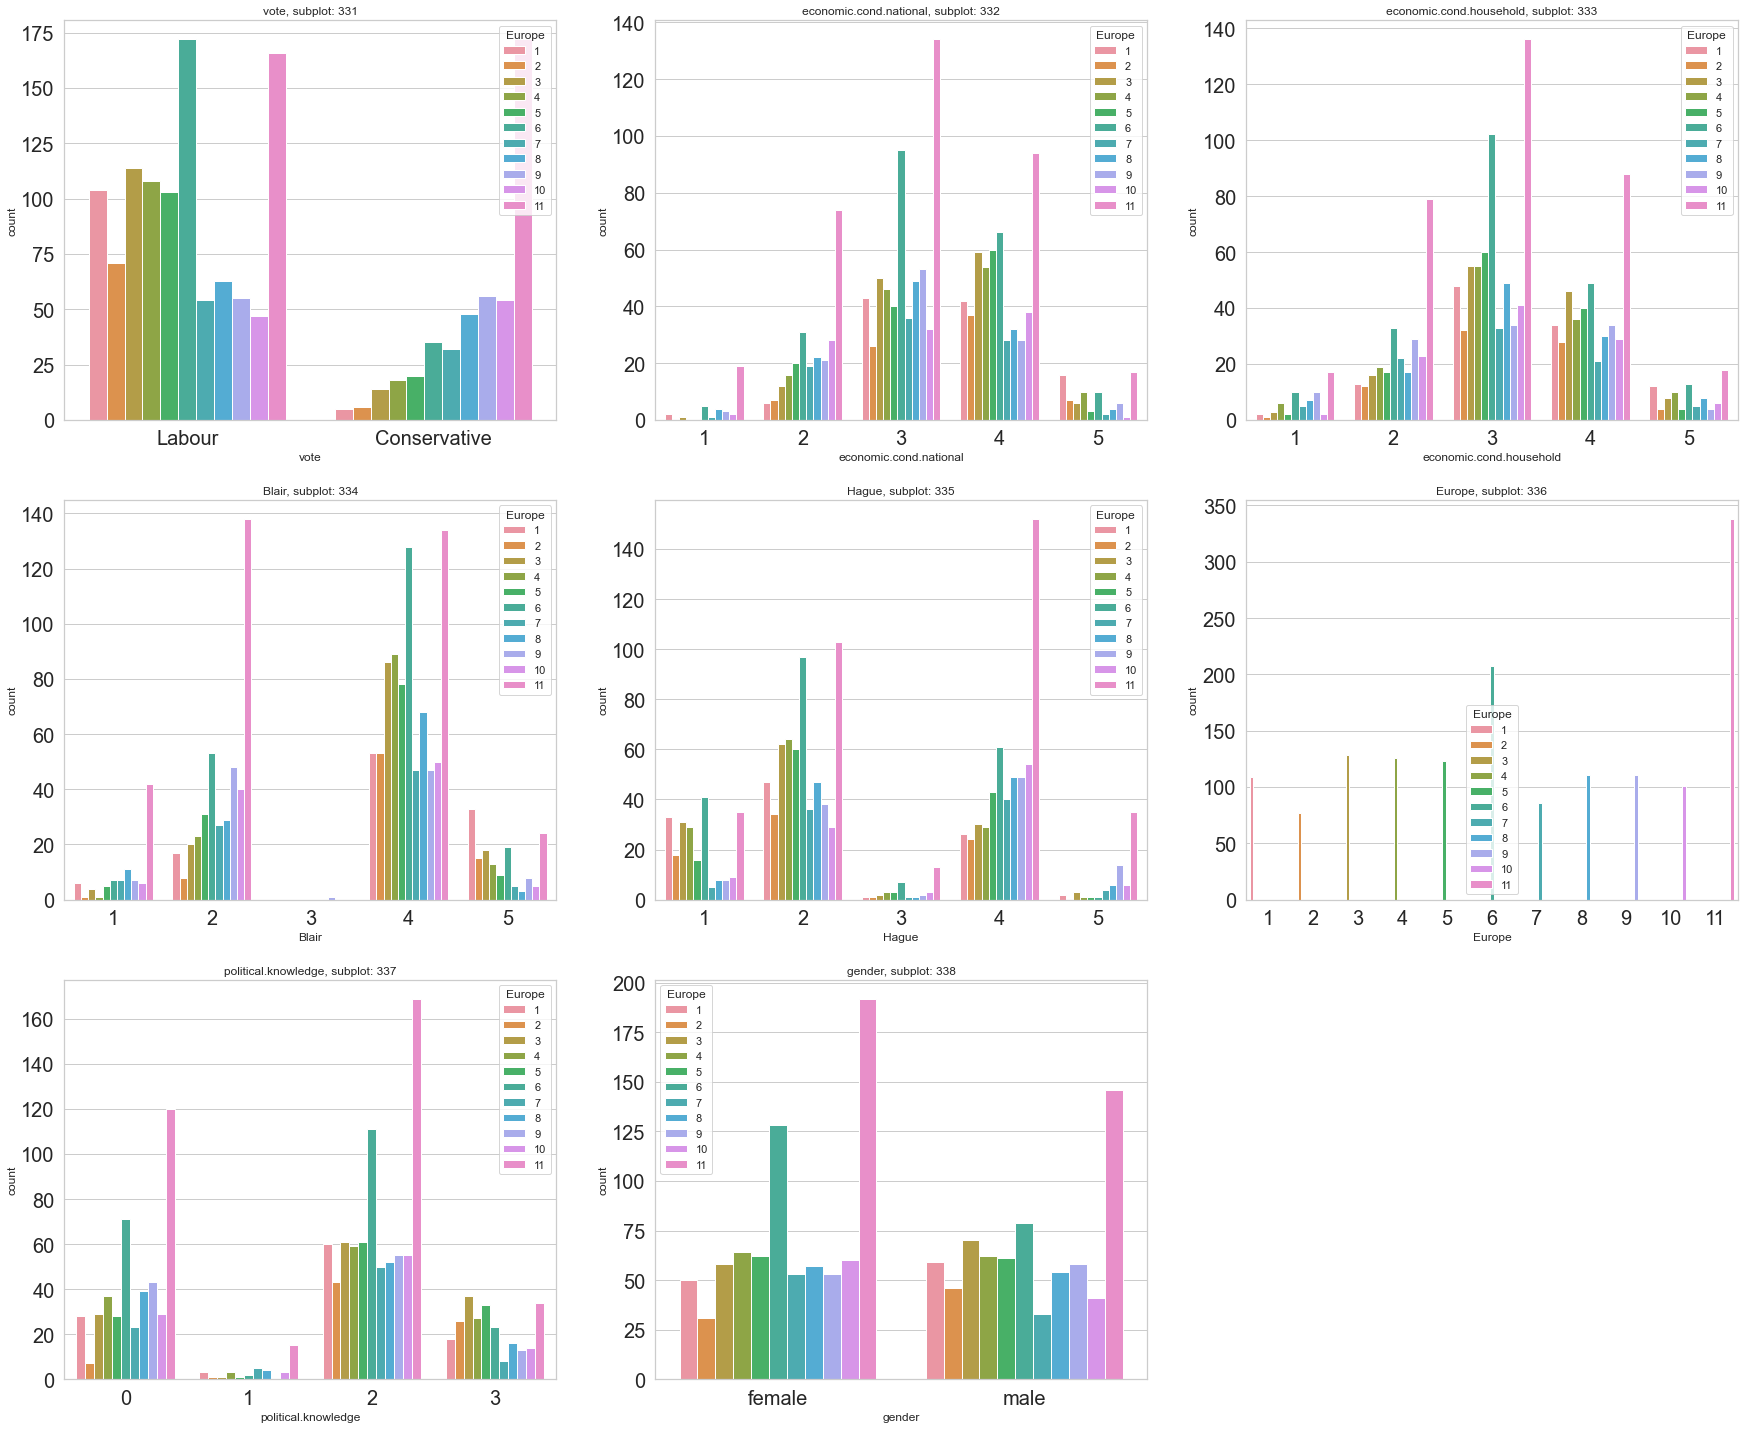

In [12]:
#bivariate plot-Europe
fig = plt.figure(figsize=(30,25))
c = 1
for i in cat:
    plt.subplot(3, 3, c)
    plt.title('{}, subplot: {}{}{}'.format(i, 3, 3, c))
    plt.xlabel(i)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    #sns.barplot(el_df[i],el_df['age'])
    sns.countplot(x= el_df[i], data=el_df, hue = "Europe")
    plt.rcParams.update({'font.size': 20})
    c = c + 1

plt.show()

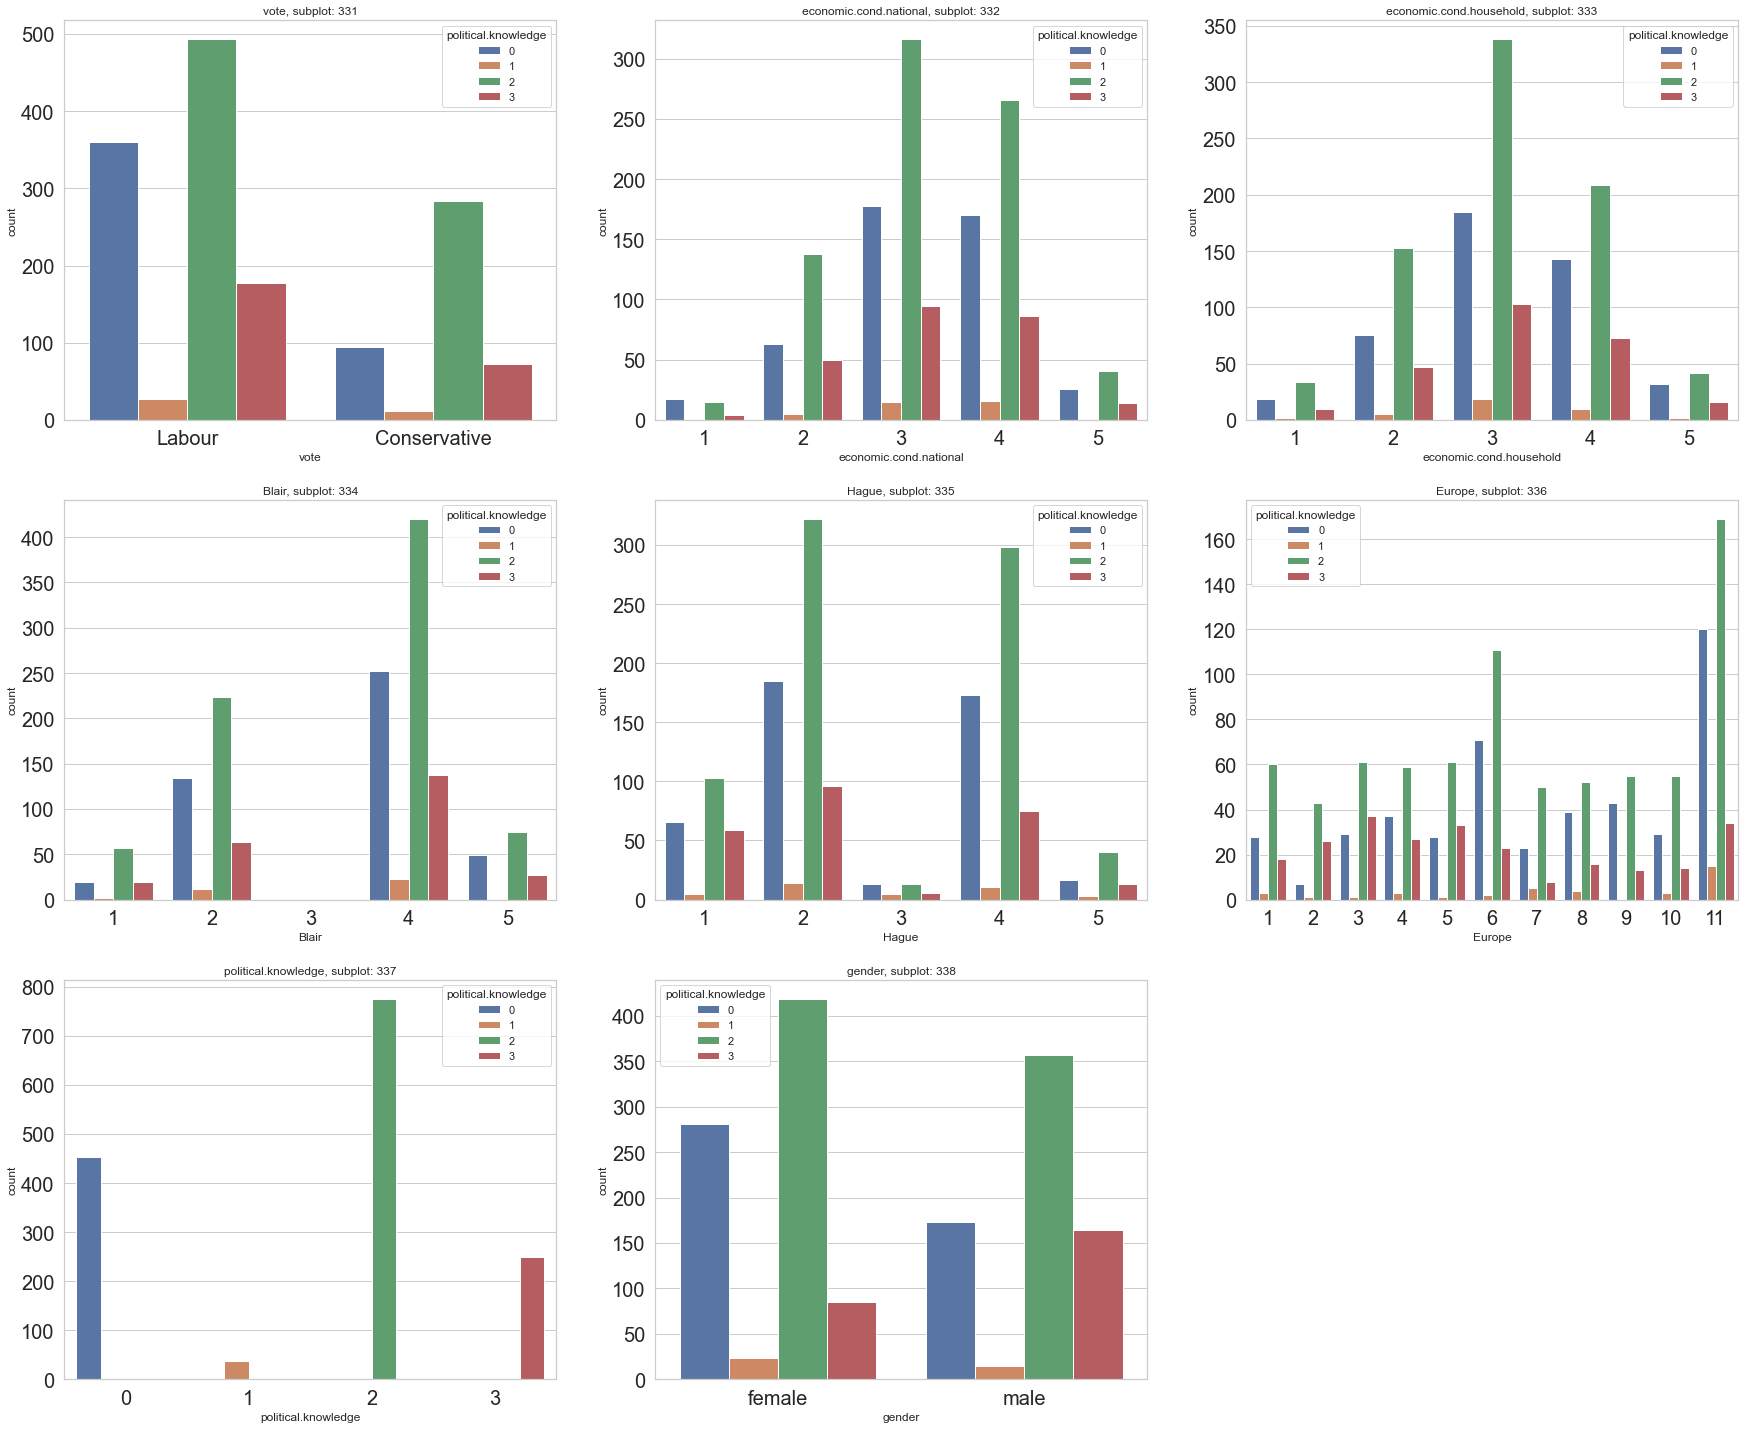

In [13]:
#bivariate plot-political.knowledge
fig = plt.figure(figsize=(30,25))
c = 1
for i in cat:
    plt.subplot(3, 3, c)
    plt.title('{}, subplot: {}{}{}'.format(i, 3, 3, c))
    plt.xlabel(i)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    #sns.barplot(el_df[i],el_df['age'])
    sns.countplot(x= el_df[i], data=el_df, hue = "political.knowledge")
    plt.rcParams.update({'font.size': 20})
    c = c + 1

plt.show()

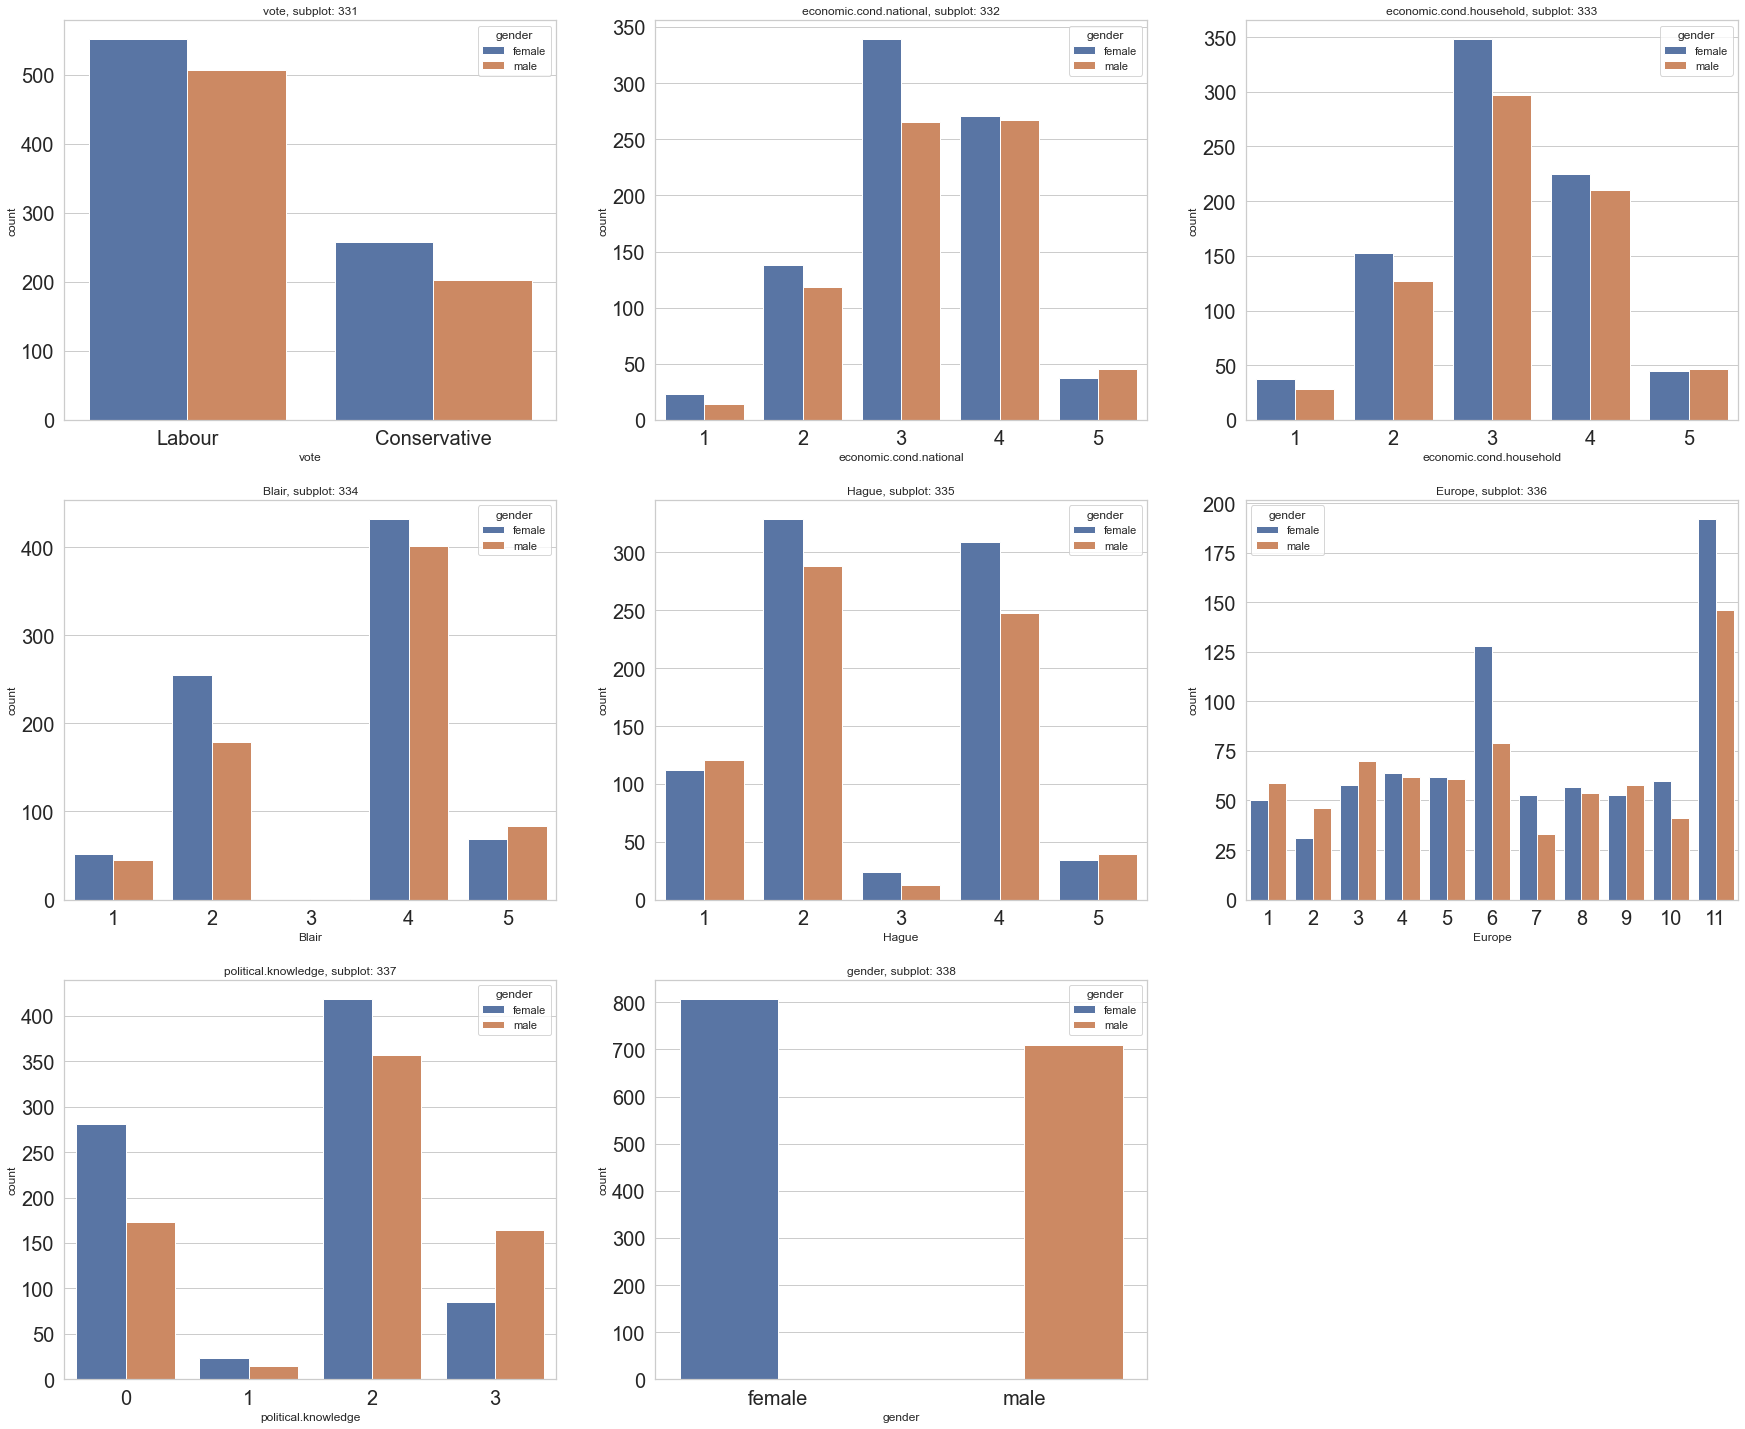

In [14]:
#bivariate plot-gender
fig = plt.figure(figsize=(30,25))
c = 1
for i in cat:
    plt.subplot(3, 3, c)
    plt.title('{}, subplot: {}{}{}'.format(i, 3, 3, c))
    plt.xlabel(i)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    #sns.barplot(el_df[i],el_df['age'])
    sns.countplot(x= el_df[i], data=el_df, hue = "gender")
    plt.rcParams.update({'font.size': 20})
    c = c + 1

plt.show()

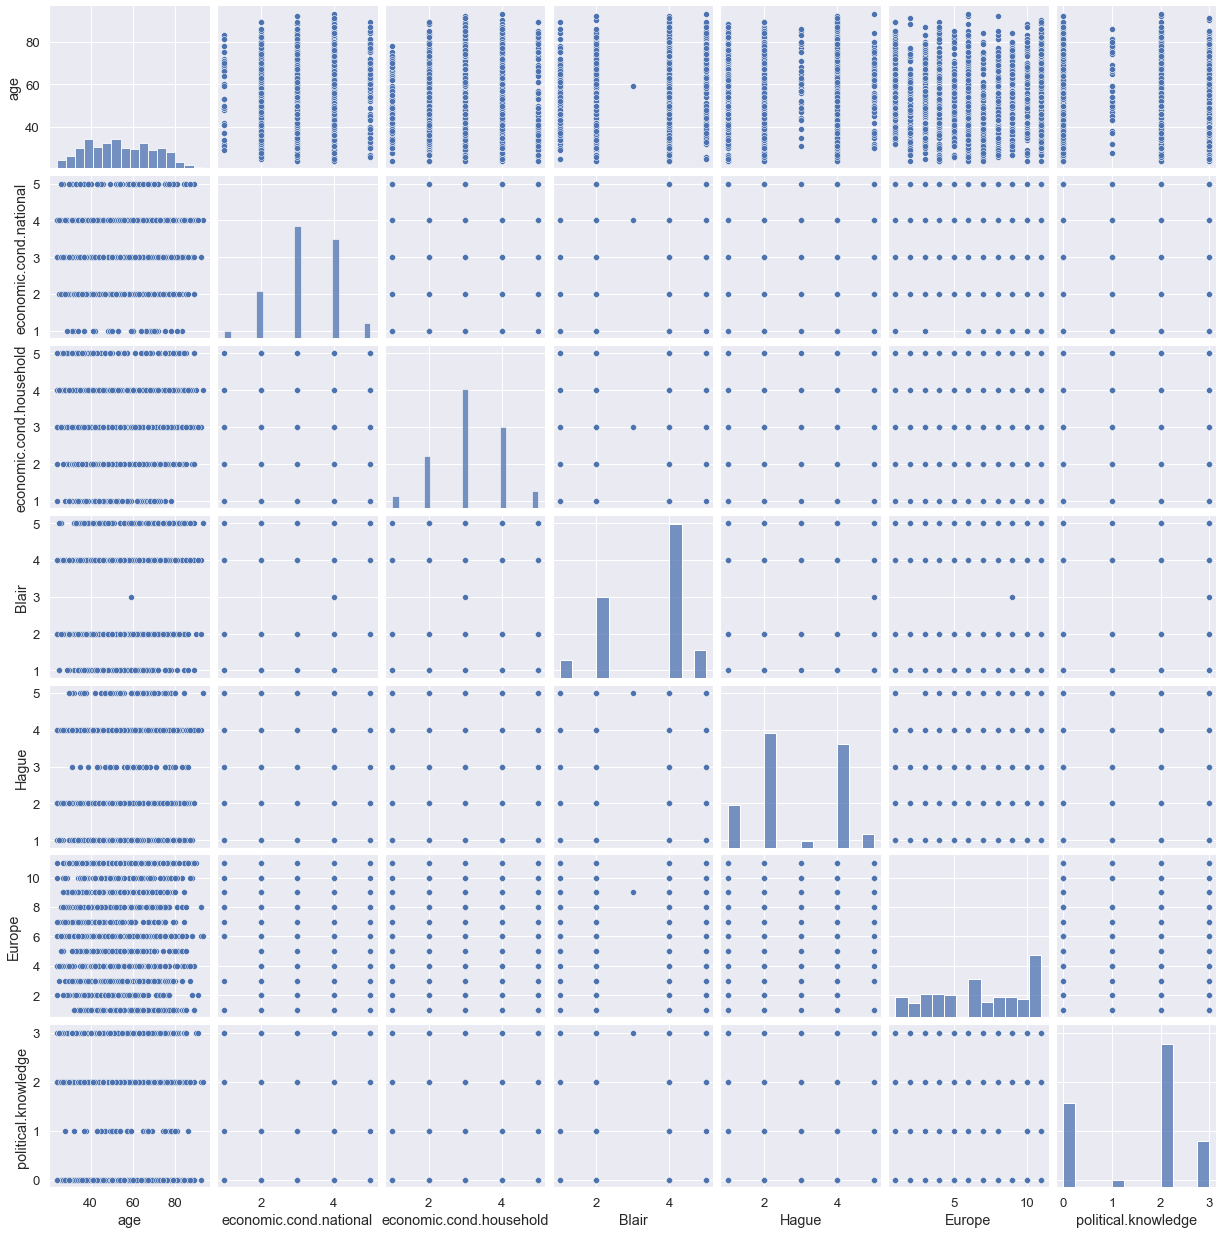

In [39]:
# Check with the pairplots for bi variate data
sns.pairplot(el_df,diag_kind='hist')
plt.show()

**1.3) Encode the data (having string values) for Modelling. Is Scaling necessary here or not?( 2 pts), Data Split: Split the data into train and test (70:30) (2 pts). The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling. Object data should be converted into categorical/numerical data to fit in the models. (pd.categorical().codes(), pd.get_dummies(drop_first=True)) Data split, ratio defined for the split, train-test split should be discussed.**

In [67]:
#Bi variate analysis for Categorical variables
eco_nat_house_table = pd.crosstab(index=el_df["economic.cond.national"], 
                          columns=el_df["economic.cond.household"])

eco_nat_house_table

economic.cond.household,1,2,3,4,5
economic.cond.national,,,,,
1,15,10,7,4,1
2,13,105,91,42,5
3,23,101,320,134,26
4,12,57,198,232,39
5,2,7,29,23,21


<AxesSubplot:xlabel='economic.cond.national'>

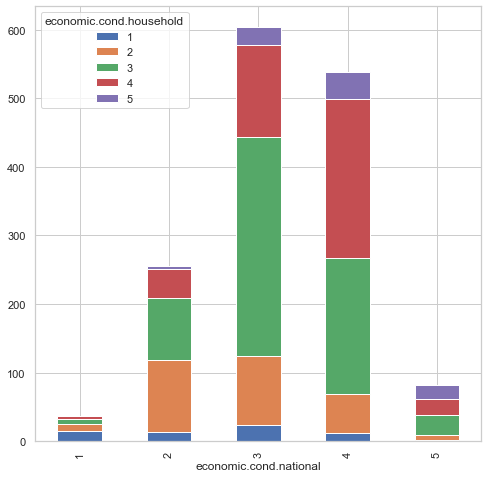

In [68]:
eco_nat_house_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

In [74]:
#converting all dicrete categorical data type into numerical ones to carry on with the model formaton
el_df['economic.cond.national'] = el_df['economic.cond.national'].astype('int64')
el_df['economic.cond.household'] = el_df['economic.cond.household'].astype('int64')
el_df['Blair'] = el_df['Blair'].astype('int64')
el_df['Hague'] = el_df['Hague'].astype('int64')
el_df['Europe'] = el_df['Europe'].astype('int64')
el_df['political.knowledge'] = el_df['political.knowledge'].astype('int64')

In [6]:
#**Convert Object datatypes to categorical** using encoding
el_df['vote'] = pd.get_dummies(el_df['vote'],drop_first= True)
el_df['gender'] = pd.get_dummies(el_df['gender'],drop_first= True)

In [6]:
el_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   vote                     1525 non-null   uint8
 1   age                      1525 non-null   int64
 2   economic.cond.national   1525 non-null   int64
 3   economic.cond.household  1525 non-null   int64
 4   Blair                    1525 non-null   int64
 5   Hague                    1525 non-null   int64
 6   Europe                   1525 non-null   int64
 7   political.knowledge      1525 non-null   int64
 8   gender                   1525 non-null   uint8
dtypes: int64(7), uint8(2)
memory usage: 86.5 KB


In [77]:
el_df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,43,3,3,4,1,2,2,0
1,1,36,4,4,4,4,5,2,1
2,1,35,4,4,5,2,3,2,1
3,1,24,4,2,2,1,4,0,0
4,1,41,2,2,1,1,6,2,1


In [79]:
num = el_df.dtypes[el_df.dtypes!='object'].index

<AxesSubplot:>

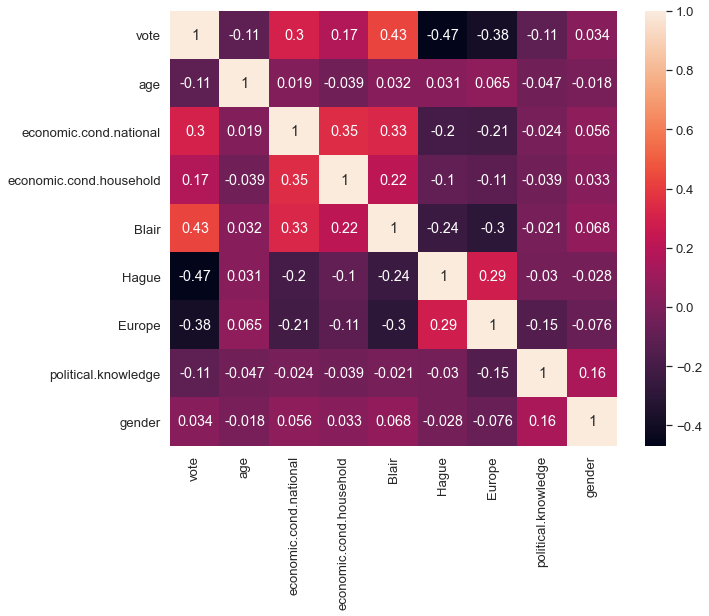

In [80]:
# construct heatmap with only continuous variables
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(el_df[num].corr(),annot = True)

# Model building

In [7]:
# Copy all the predictor variables into X dataframe. Since 'Vote' is dependent variable drop it
x = el_df.drop('vote', axis=1)
# Copy the 'vote' column alone into the y dataframe. This is the dependent variable
y = el_df[['vote']]

In [61]:
print('The shape of X and Y are {} and {} respectively '.format(x.shape,y.shape))

The shape of X and Y are (1517, 8) and (1517, 1) respectively 


# train test split

In [8]:
# Split X and Y into training and test set in 70:30 ratio
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3)

In [63]:
#Shape of x,y -train and test
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((1061, 8), (456, 8), (1061, 1), (456, 1))

In [35]:
print('The shape of the training records in the dataset i.e., X_train and Y_train are {} and {} '.format(xtrain.shape,ytrain.shape))

The shape of the training records in the dataset i.e., X_train and Y_train are (1061, 8) and (1061, 1) 


In [36]:
print('The shape of the training records in the dataset i.e., X_test and Y_test are {} and {} '.format(xtest.shape,ytest.shape))

The shape of the training records in the dataset i.e., X_test and Y_test are (456, 8) and (456, 1) 


In [37]:
#Class variation- ytrain
ytrain.value_counts(normalize = True)*100

vote
1       69.557022
0       30.442978
dtype: float64

In [38]:
#Class variation- ytest
ytest.value_counts(normalize = True)*100

vote
1       69.95614
0       30.04386
dtype: float64

In [59]:
#Different types of columns names
el_df.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

In [9]:
#import the standard scaler for scaling the data- KNN, logistic regression
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()

In [10]:
#Scale the overall X_train data- to avoid data leakage-using fit_transform
num_col = ['age', 'economic.cond.national', 'economic.cond.household',
           'Blair', 'Hague', 'Europe', 'political.knowledge']
#num1 = ['age']
xtrain[num_col] = SS.fit_transform(xtrain[num_col])
xtrain.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1045,-1.101135,-2.583841,-1.276320,0.567413,1.026353,1.289192,-1.432686,0
126,-0.528437,0.842978,-0.176259,0.567413,1.026353,-1.419983,0.415435,1
298,1.253291,-0.299295,-1.276320,0.567413,-0.612414,1.289192,-1.432686,0
1243,-0.846603,-2.583841,0.923803,1.422563,-1.431797,1.289192,-1.432686,1
1155,0.616959,-0.299295,-0.176259,0.567413,-0.612414,-0.215906,-1.432686,0


In [11]:
#Scale the overall X_test data- to avoid data leakage-using transform
xtest[num_col] = SS.transform(xtest[num_col])
xtest.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
299,-1.546567,0.842978,-0.176259,0.567413,-1.431797,-1.419983,0.415435,1
941,0.426060,1.985251,2.023864,0.567413,1.026353,-0.215906,-1.432686,1
1400,0.616959,-0.299295,-1.276320,-1.142886,1.026353,0.988172,0.415435,0
76,-0.782969,0.842978,-0.176259,0.567413,-0.612414,-0.817944,0.415435,0
413,-0.273904,-1.441568,-1.276320,0.567413,1.026353,-1.419983,0.415435,1


In [12]:
#Install class imbalace module
!pip install imbalanced-learn

In [13]:
from imblearn.over_sampling import SMOTE

In [14]:
#Use of random over sampling method 
sm = SMOTE(random_state=2)
X_train_res, Y_train_res = sm.fit_resample(xtrain, ytrain)
#print('Resampled dataset shape %s' % Counter(Y_train_res))

In [15]:
## Let's check the shape after SMOTE
X_train_res.shape, Y_train_res.shape

((1488, 8), (1488, 1))

In [69]:
#shape of y_train
ytrain.value_counts()

vote
1       738
0       323
dtype: int64

In [16]:
#shape of y_train_smote
Y_train_res.value_counts()

vote
0       743
1       743
dtype: int64

# Logistic Regression


In [17]:
log_reg = LogisticRegression()
log_reg.fit(xtrain, ytrain)

pred1 = log_reg.predict(xtrain)
print(classification_report(ytrain, pred1))

pred2 = log_reg.predict(xtest)
print(classification_report(ytest, pred2))

              precision    recall  f1-score   support

           0       0.77      0.68      0.72       320
           1       0.87      0.91      0.89       747

    accuracy                           0.84      1067
   macro avg       0.82      0.79      0.80      1067
weighted avg       0.84      0.84      0.84      1067

              precision    recall  f1-score   support

           0       0.74      0.67      0.70       142
           1       0.86      0.89      0.87       316

    accuracy                           0.82       458
   macro avg       0.80      0.78      0.79       458
weighted avg       0.82      0.82      0.82       458



In [18]:
log_train_auc = roc_auc_score(ytrain,log_reg.predict_proba(xtrain)[:,1])
print('Area under Curve is', log_train_auc)

Area under Curve is 0.894354501338688


In [19]:
log_test_auc = roc_auc_score(ytest,log_reg.predict_proba(xtest)[:,1])
print('Area under Curve is', log_test_auc)

Area under Curve is 0.8717908718131574


In [84]:
confusion_matrix(ytrain, pred1)

array([[212, 103],
       [ 67, 679]], dtype=int64)

In [91]:
log_reg.intercept_

array([2.69209946])

In [92]:
log_reg.coef_

array([[-0.28855444,  0.41804798,  0.04722016,  0.5489303 , -0.8735365 ,
        -0.22391334, -0.4333142 ,  0.01621099]])

In [93]:
coef_model1 = pd.DataFrame(np.ndarray.flatten(log_reg.coef_),index=xtrain.columns, columns=['coef'])
coef_model1

,coef
age,-0.288554
economic.cond.national,0.418048
economic.cond.household,0.047220
Blair,0.548930
Hague,-0.873536
Europe,-0.223913
political.knowledge,-0.433314
gender,0.016211


In [94]:
(coef_model1**2).sum()

coef    1.562809
dtype: float64

In [95]:
coef_model1.abs().sum()

coef    2.849728
dtype: float64

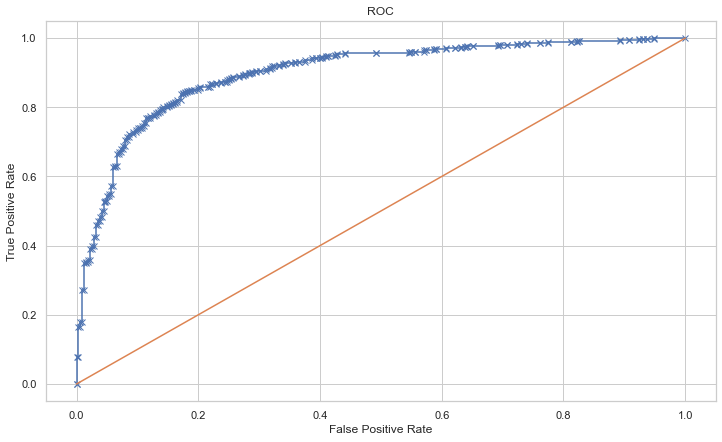

Area under Curve is 0.8986212179241669


In [95]:
#Check for the roc auc score and auc score
log_train_fpr, log_train_tpr,_=roc_curve(ytrain,log_reg.predict_proba(xtrain)[:,1])
plt.figure(figsize=(12,7))
plt.plot(log_train_fpr, log_train_tpr, marker='x', label='Logistic Regression')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
log_train_auc = roc_auc_score(ytrain,log_reg.predict_proba(xtrain)[:,1])
print('Area under Curve is', log_train_auc )

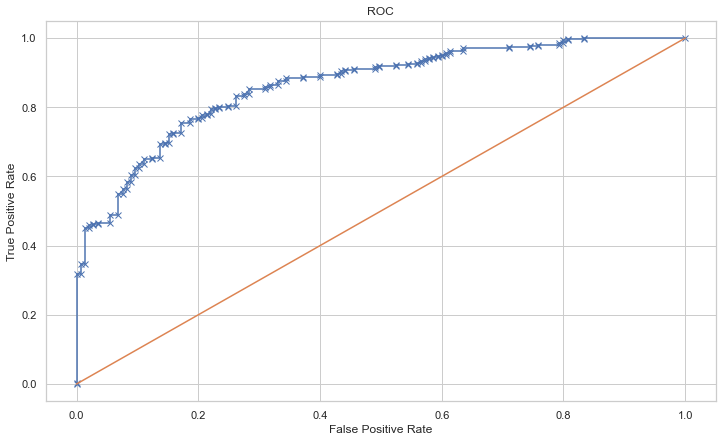

Area under Curve is 0.8649961193036921


In [96]:
#Check for the roc auc score and auc score
log_test_fpr, log_test_tpr,_=roc_curve(ytest,log_reg.predict_proba(xtest)[:,1])
plt.figure(figsize=(12,7))
plt.plot(log_test_fpr, log_test_tpr, marker='x', label='Logistic Regression')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
log_test_auc = roc_auc_score(ytest,log_reg.predict_proba(xtest)[:,1])
print('Area under Curve is', log_test_auc)

### Tune the model using hyperparameter- Grid search CV

In [97]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=log_reg, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.834318 using {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.831679 (0.027929) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.832340 (0.027337) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.831679 (0.027929) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.831679 (0.027929) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.832119 (0.027560) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.832337 (0.027934) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.831900 (0.027608) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.832119 (0.028230) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.832121 (0.026532) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.834318 (0.025586) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.834097 (0.025670) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.827955 (0.025955) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.831463 (0.028526) wit

#### Use the best parameter to get better model performance
*Best: 0.834318 using {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}*

In [98]:
#Redefine the model with the above mentioned parameters
log_reg2 = LogisticRegression( C = 0.1, penalty = 'l2', solver = 'newton-cg')
log_reg2.fit(xtrain, ytrain)

pred1 = log_reg2.predict(xtrain)
print(classification_report(ytrain, pred1))

pred2 = log_reg2.predict(xtest)
print(classification_report(ytest, pred2))

              precision    recall  f1-score   support

           0       0.79      0.66      0.72       315
           1       0.86      0.93      0.90       746

    accuracy                           0.85      1061
   macro avg       0.83      0.79      0.81      1061
weighted avg       0.84      0.85      0.84      1061

              precision    recall  f1-score   support

           0       0.72      0.65      0.68       145
           1       0.84      0.88      0.86       311

    accuracy                           0.81       456
   macro avg       0.78      0.76      0.77       456
weighted avg       0.80      0.81      0.80       456



In [98]:
confusion_matrix(ytrain, pred1)

array([[208, 107],
       [ 66, 680]], dtype=int64)

In [99]:
confusion_matrix(ytest, pred2)

array([[ 87,  58],
       [ 22, 289]], dtype=int64)

In [100]:
coef_model2 = pd.DataFrame(np.ndarray.flatten(log_reg2.coef_),index=xtrain.columns, columns=['coef'])
coef_model2

,coef
age,-0.262864
economic.cond.national,0.380755
economic.cond.household,0.059127
Blair,0.521896
Hague,-0.822856
Europe,-0.223164
political.knowledge,-0.401750
gender,0.010970


In [101]:
(coef_model2**2).sum()

coef    1.378361
dtype: float64

In [102]:
coef_model2.abs().sum()

coef    2.683382
dtype: float64

## Predicting on Training and Test dataset

In [102]:
ytrain_predict = log_reg2.predict(xtrain)
ytest_predict = log_reg2.predict(xtest)

## Getting Predicted class and probs

In [103]:
ytest_predict
ytest_predict_prob=log_reg2.predict_proba(xtest)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.094161,0.905839
1,0.548846,0.451154
2,0.043435,0.956565
3,0.062413,0.937587
4,0.381224,0.618776


## Model Evaluation

### AUC and ROC for the training data

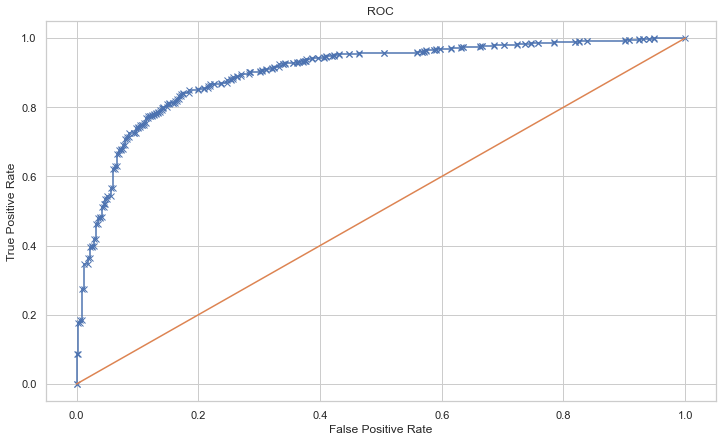

Area under Curve is 0.8986595174262735


In [99]:
#Check for the roc auc score and auc score
log_train_fpr, log_train_tpr,_=roc_curve(ytrain,log_reg2.predict_proba(xtrain)[:,1])
plt.figure(figsize=(12,7))
plt.plot(log_train_fpr, log_train_tpr, marker='x', label='Logistic Regression')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
log_train_auc = roc_auc_score(ytrain,log_reg2.predict_proba(xtrain)[:,1])
print('Area under Curve is', log_train_auc )

### AUC and ROC for the testing data

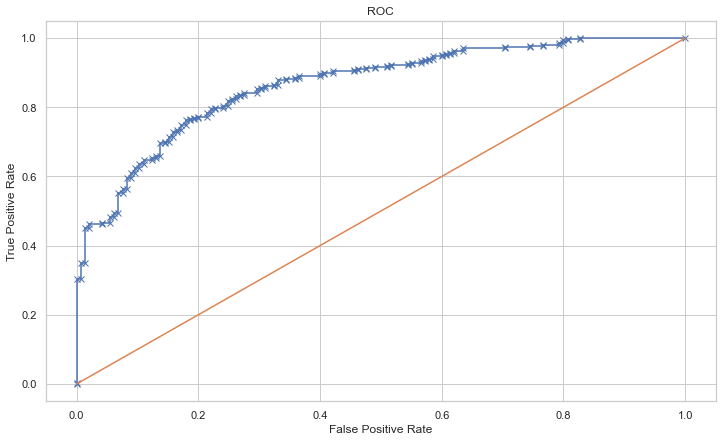

Area under Curve is 0.8655505044905201


In [100]:
#Check for the roc auc score and auc score
log_test_fpr, log_test_tpr,_=roc_curve(ytest,log_reg2.predict_proba(xtest)[:,1])
plt.figure(figsize=(12,7))
plt.plot(log_test_fpr, log_test_tpr, marker='x', label='Logistic Regression')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
log_test_auc = roc_auc_score(ytest,log_reg2.predict_proba(xtest)[:,1])
print('Area under Curve is', log_test_auc)

### Confusion Matrix for the training data

In [108]:
#Check Confusion matrix for train dataset
print(confusion_matrix(ytrain, ytrain_predict))

[[208 107]
 [ 66 680]]


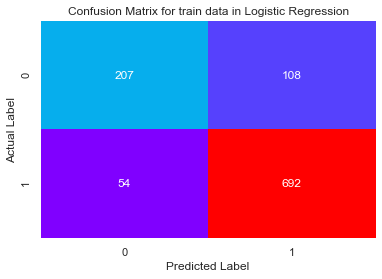

In [104]:
# Get the confusion matrix on the train data
confusion_matrix(ytrain, ytrain_predict)
sns.heatmap(confusion_matrix(ytrain, ytrain_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for train data in Logistic Regression')
plt.show()

### Data Accuracy

In [110]:
#Check for the accuracy score
log_train_acc = log_reg2.score(xtrain,ytrain)
log_train_acc

0.8369462770970783

### Classification Report

In [111]:
#Check Classification report for train dataset
print(classification_report(ytrain, ytrain_predict))

              precision    recall  f1-score   support

           0       0.76      0.66      0.71       315
           1       0.86      0.91      0.89       746

    accuracy                           0.84      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



### Evaluation Metrices

In [112]:
log_metrics=classification_report(ytrain, ytrain_predict,output_dict=True)
df=pd.DataFrame(log_metrics).transpose()
log_train_f1=round(df.loc["1"][2],2)
log_train_recall=round(df.loc["1"][1],2)
log_train_precision=round(df.loc["1"][0],2)
print ('log_train_precision ',log_train_precision)
print ('log_train_recall ',log_train_recall)
print ('log_train_f1 ',log_train_f1)

log_train_precision  0.86
log_train_recall  0.91
log_train_f1  0.89


### Confusion Matrix for the test data

In [113]:
#Check Confusion matrix for train dataset
print(confusion_matrix(ytest, ytest_predict))

[[ 87  58]
 [ 22 289]]


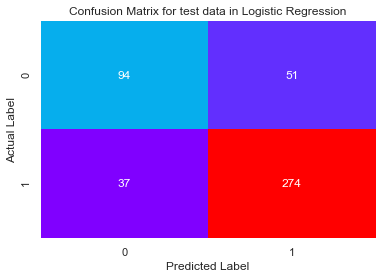

In [106]:
# Get the confusion matrix on the train data
confusion_matrix(ytest, ytest_predict)
sns.heatmap(confusion_matrix(ytest, ytest_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for test data in Logistic Regression')
plt.show()

### Data Accuracy

In [115]:
#Check for the accuracy score
log_test_acc = log_reg2.score(xtest,ytest)
log_test_acc

0.8245614035087719

### Classification Report

In [116]:
#Check Classification report for train dataset
print(classification_report(ytest, ytest_predict))

              precision    recall  f1-score   support

           0       0.80      0.60      0.69       145
           1       0.83      0.93      0.88       311

    accuracy                           0.82       456
   macro avg       0.82      0.76      0.78       456
weighted avg       0.82      0.82      0.82       456



### Evaluation Metrices

In [117]:
log_metrics=classification_report(ytest, ytest_predict,output_dict=True)
df=pd.DataFrame(log_metrics).transpose()
log_test_f1=round(df.loc["1"][2],2)
log_test_recall=round(df.loc["1"][1],2)
log_test_precision=round(df.loc["1"][0],2)
print ('log_test_precision ',log_test_precision)
print ('log_test_recall ',log_test_recall)
print ('log_test_f1 ',log_test_f1)

log_test_precision  0.83
log_test_recall  0.93
log_test_f1  0.88


## Logistic Regression with SMOTE

In [107]:
X_train_res, Y_train_res = sm.fit_resample(xtrain, ytrain)

In [108]:
#Redefine the model with the above mentioned parameters
log_reg_smote = LogisticRegression( C = 0.1, penalty = 'l2', solver = 'newton-cg')
#log_reg_smote = LogisticRegression()
log_reg_smote.fit(X_train_res, Y_train_res)

pred1 = log_reg_smote.predict(X_train_res)
print(classification_report(Y_train_res, pred1))

pred2 = log_reg_smote.predict(xtest)
print(classification_report(ytest, pred2))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       746
           1       0.85      0.84      0.84       746

    accuracy                           0.85      1492
   macro avg       0.85      0.85      0.85      1492
weighted avg       0.85      0.85      0.85      1492

              precision    recall  f1-score   support

           0       0.65      0.77      0.71       145
           1       0.88      0.81      0.85       311

    accuracy                           0.80       456
   macro avg       0.77      0.79      0.78       456
weighted avg       0.81      0.80      0.80       456



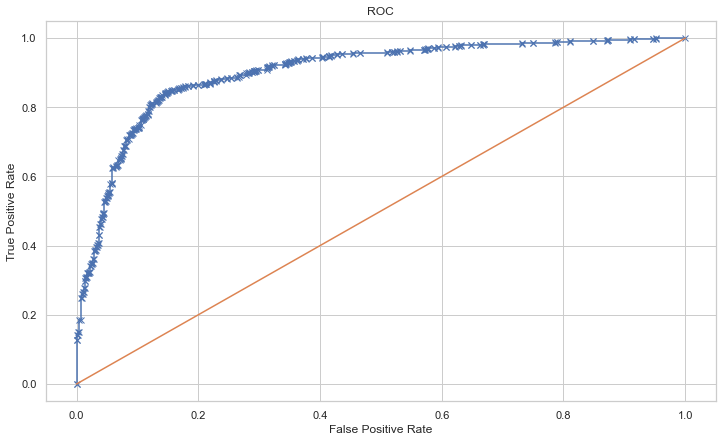

Area under Curve is 0.9021645379467975


In [109]:
#Check for the roc auc score and auc score
log_train_fpr, log_train_tpr,_=roc_curve(Y_train_res,log_reg_smote.predict_proba(X_train_res)[:,1])
plt.figure(figsize=(12,7))
plt.plot(log_train_fpr, log_train_tpr, marker='x', label='Logistic Regression')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
log_train_auc = roc_auc_score(Y_train_res,log_reg_smote.predict_proba(X_train_res)[:,1])
print('Area under Curve is', log_train_auc )

### AUC and ROC for the testing data

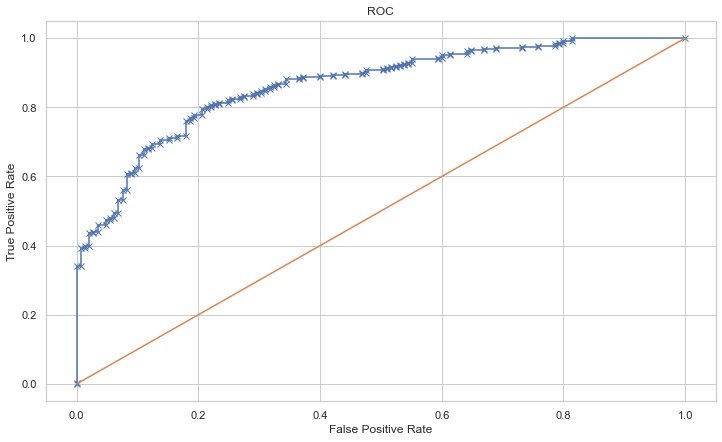

Area under Curve is 0.8643752078944451


In [111]:
#Check for the roc auc score and auc score
log_test_fpr, log_test_tpr,_=roc_curve(ytest,log_reg_smote.predict_proba(xtest)[:,1])
plt.figure(figsize=(12,7))
plt.plot(log_test_fpr, log_test_tpr, marker='x', label='Logistic Regression')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
log_test_auc = roc_auc_score(ytest,log_reg_smote.predict_proba(xtest)[:,1])
print('Area under Curve is', log_test_auc)

## LDA

In [112]:
ldamodel = LinearDiscriminantAnalysis()
ldamodel.fit(xtrain, ytrain)

pred3 = ldamodel.predict(xtrain)
print(classification_report(ytrain, pred3))
confusion_matrix(ytrain, pred3)

# Prediction on the xtest data
pred4 = ldamodel.predict(xtest)
print(classification_report(ytest, pred4))
confusion_matrix(ytest, pred4)

              precision    recall  f1-score   support

           0       0.76      0.69      0.72       315
           1       0.87      0.91      0.89       746

    accuracy                           0.84      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.84      0.84      0.84      1061

              precision    recall  f1-score   support

           0       0.71      0.66      0.68       145
           1       0.85      0.88      0.86       311

    accuracy                           0.81       456
   macro avg       0.78      0.77      0.77       456
weighted avg       0.80      0.81      0.80       456



array([[ 95,  50],
       [ 38, 273]], dtype=int64)

In [115]:
#Evaluation metrics for train lda data
lda_metrics=classification_report(ytrain, pred3,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_train_f1=round(df.loc["1"][2],2)
lda_train_recall=round(df.loc["1"][1],2)
lda_train_precision=round(df.loc["1"][0],2)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print ('lda_train_f1 ',lda_train_f1)

lda_train_precision  0.87
lda_train_recall  0.91
lda_train_f1  0.89


In [116]:
#Evaluation metrics for test lda data
lda_metrics=classification_report(ytest, pred4,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_test_f1=round(df.loc["1"][2],2)
lda_test_recall=round(df.loc["1"][1],2)
lda_test_precision=round(df.loc["1"][0],2)
print ('lda_test_precision ',lda_test_precision)
print ('lda_test_recall ',lda_test_recall)
print ('lda_test_f1 ',lda_test_f1)

lda_test_precision  0.85
lda_test_recall  0.88
lda_test_f1  0.86


In [128]:
#Check for the accuracy score
lda_train_acc = ldamodel.score(xtrain,ytrain)
lda_train_acc

0.8397737983034873

In [129]:
#Check for the accuracy score
lda_test_acc = ldamodel.score(xtest,ytest)
lda_test_acc

0.8179824561403509

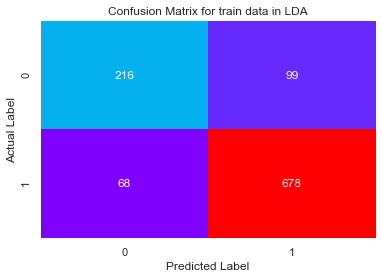

In [117]:
# Get the confusion matrix on the train data
confusion_matrix(ytrain, pred3)
sns.heatmap(confusion_matrix(ytrain, pred3),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for train data in LDA')
plt.show()

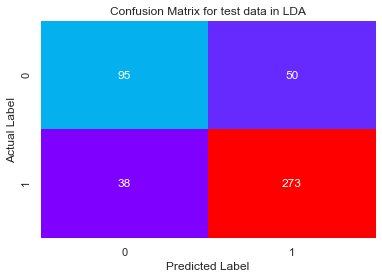

In [118]:
# Get the confusion matrix on the test data
confusion_matrix(ytest, pred4)
sns.heatmap(confusion_matrix(ytest, pred4),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for test data in LDA')
plt.show()

In [132]:
#model intercept
ldamodel.intercept_

array([3.00784613])

In [133]:
coef = np.ndarray.flatten(ldamodel.coef_)
coef

array([-0.36565743,  0.41293794,  0.04590683,  0.69853005, -1.01674855,
       -0.24363295, -0.5404549 ,  0.01152228])

In [134]:
ds = ldamodel.intercept_ + xtrain.iloc[:,0] * coef[0] + xtrain.iloc[:,1] * coef[1] +  xtrain.iloc[:,2] * coef[2] + xtrain.iloc[:,3] * coef[3] + xtrain.iloc[:,4] * coef[4] + xtrain.iloc[:,5] * coef[5] 

In [130]:
ds

690   -0.137171
752    0.916908
864    0.394962
510   -0.411092
278   -2.121098
         ...   
426   -0.196383
60    -0.891297
715    0.862013
462   -1.036523
446   -0.872193
Length: 610, dtype: float64

In [135]:
sns.kdeplot(ds[ytrain==0])
sns.kdeplot(ds[ytrain==1])

TypeError: Indexing a Series with DataFrame is not supported, use the appropriate DataFrame column

## Model Evaluation for LDA

### Training Data

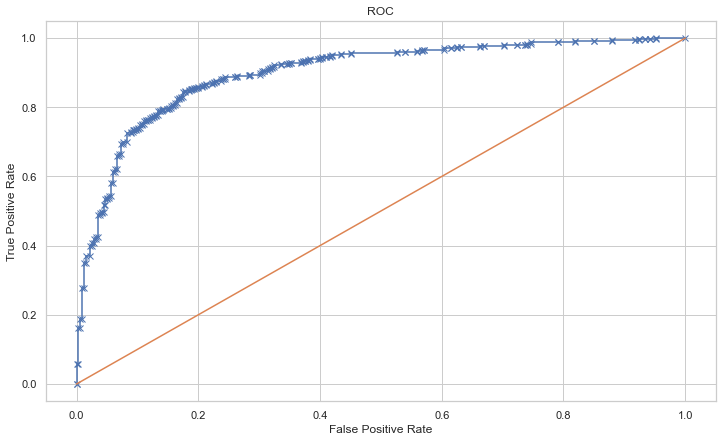

Area under Curve is 0.8986935614281458


In [119]:
#Check for the roc auc score and auc score
lda_fpr, lda_tpr,_=roc_curve(ytrain,ldamodel.predict_proba(xtrain)[:,1])
plt.figure(figsize=(12,7))
plt.plot(lda_fpr, lda_tpr, marker='x', label='LDA')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
lda_train_auc = roc_auc_score(ytrain,ldamodel.predict_proba(xtrain)[:,1])
print('Area under Curve is', lda_train_auc )

### Evaluation metrices for train data

In [137]:
lda_metrics=classification_report(ytrain, pred3,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_train_f1=round(df.loc["1"][2],2)
lda_train_recall=round(df.loc["1"][1],2)
lda_train_precision=round(df.loc["1"][0],2)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print ('lda_train_f1 ',lda_train_f1)

lda_train_precision  0.87
lda_train_recall  0.9
lda_train_f1  0.89


In [138]:
#Check for the accuracy score of test data
lda_train_acc = ldamodel.score(xtrain,ytrain)
lda_train_acc

0.8397737983034873

### Test Data

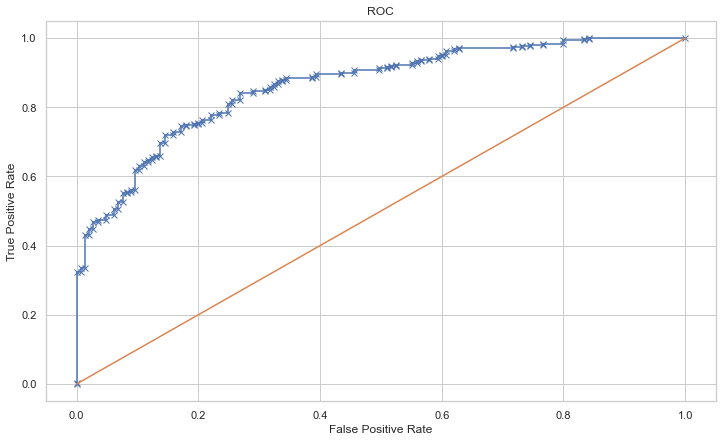

Area under Curve is 0.8631112096684775


In [120]:
#Check for the roc auc score and auc score
lda_fpr, lda_tpr,_=roc_curve(ytest,ldamodel.predict_proba(xtest)[:,1])
plt.figure(figsize=(12,7))
plt.plot(lda_fpr, lda_tpr, marker='x', label='LDA')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
lda_test_auc = roc_auc_score(ytest,ldamodel.predict_proba(xtest)[:,1])
print('Area under Curve is', lda_test_auc )

### Evaluation metrices for test data

In [140]:
lda_metrics=classification_report(ytest, pred4,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_test_f1=round(df.loc["1"][2],2)
lda_test_recall=round(df.loc["1"][1],2)
lda_test_precision=round(df.loc["1"][0],2)
print ('lda_test_precision ',lda_test_precision)
print ('lda_test_recall ',lda_test_recall)
print ('lda_test_f1 ',lda_test_f1)

lda_test_precision  0.84
lda_test_recall  0.91
lda_test_f1  0.87


In [141]:
#Check for the accuracy score of test data
lda_test_acc = ldamodel.score(xtest,ytest)
lda_test_acc

0.8179824561403509

In [140]:
sns.kdeplot(prob[ytrain ==0])
sns.kdeplot(prob[ytrain ==1])

NameError: name 'prob' is not defined

In [142]:
pd.DataFrame(coef, columns=['coef'], index=xtrain.columns)

,coef
age,-0.365657
economic.cond.national,0.412938
economic.cond.household,0.045907
Blair,0.698530
Hague,-1.016749
Europe,-0.243633
political.knowledge,-0.540455
gender,0.011522


### Tune the model using hyperparameter- Grid search CV

In [121]:
solvers = ['svd', 'lsqr', 'eigen']
tols = ['float', 0.0001]

# define grid search
grid = dict(solver=solvers, tol= tols)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=ldamodel, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.831236 using {'solver': 'svd', 'tol': 0.0001}
0.000000 (0.000000) with: {'solver': 'svd', 'tol': 'float'}
0.831236 (0.028003) with: {'solver': 'svd', 'tol': 0.0001}
0.831015 (0.028159) with: {'solver': 'lsqr', 'tol': 'float'}
0.831015 (0.028159) with: {'solver': 'lsqr', 'tol': 0.0001}
0.831015 (0.028159) with: {'solver': 'eigen', 'tol': 'float'}
0.831015 (0.028159) with: {'solver': 'eigen', 'tol': 0.0001}


#### Use the best parameter to get better model performance
*Best: 0.831236 using {'solver': 'svd', 'tol': 0.0001}*

In [122]:
#Redefine the model with the above mentioned parameters
ldamodel2 = LinearDiscriminantAnalysis( solver='svd', tol=0.0001)
ldamodel2.fit(xtrain, ytrain)

pred3 = ldamodel2.predict(xtrain)
print(classification_report(ytrain, pred3))
confusion_matrix(ytrain, pred3)

# Prediction on the xtest data
pred4 = ldamodel2.predict(xtest)
print(classification_report(ytest, pred4))
confusion_matrix(ytest, pred4)

              precision    recall  f1-score   support

           0       0.76      0.69      0.72       315
           1       0.87      0.91      0.89       746

    accuracy                           0.84      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.84      0.84      0.84      1061

              precision    recall  f1-score   support

           0       0.71      0.66      0.68       145
           1       0.85      0.88      0.86       311

    accuracy                           0.81       456
   macro avg       0.78      0.77      0.77       456
weighted avg       0.80      0.81      0.80       456



array([[ 95,  50],
       [ 38, 273]], dtype=int64)

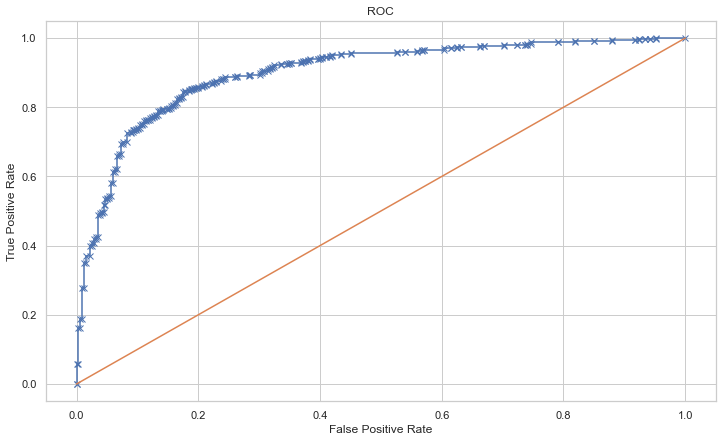

Area under Curve is 0.8986935614281458


In [123]:
#Check for the roc auc score and auc score
lda_fpr, lda_tpr,_=roc_curve(ytrain,ldamodel2.predict_proba(xtrain)[:,1])
plt.figure(figsize=(12,7))
plt.plot(lda_fpr, lda_tpr, marker='x', label='LDA')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
lda_train_auc = roc_auc_score(ytrain,ldamodel2.predict_proba(xtrain)[:,1])
print('Area under Curve is', lda_train_auc )

### Evaluation metrices for train data

In [26]:
lda_metrics=classification_report(ytrain, pred3,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_train_f1=round(df.loc["1"][2],2)
lda_train_recall=round(df.loc["1"][1],2)
lda_train_precision=round(df.loc["1"][0],2)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print ('lda_train_f1 ',lda_train_f1)

lda_train_precision  0.86
lda_train_recall  0.91
lda_train_f1  0.89


In [28]:
#Check for the accuracy score of test data
lda_train_acc = ldamodel2.score(xtrain,ytrain)
lda_train_acc

0.8350612629594723

### Test Data

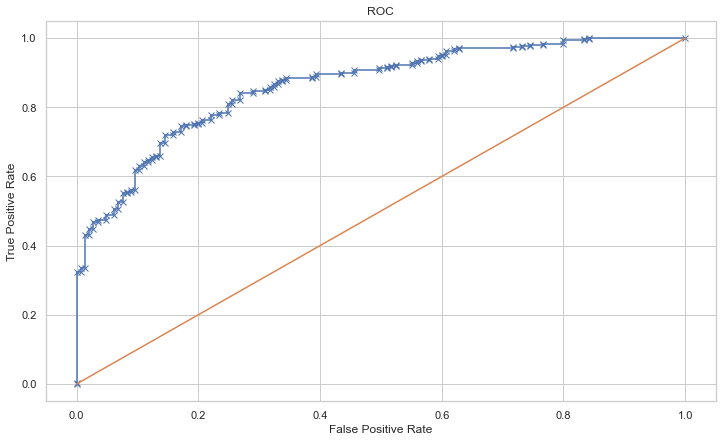

Area under Curve is 0.8631112096684775


In [132]:
#Check for the roc auc score and auc score
lda_fpr, lda_tpr,_=roc_curve(ytest,ldamodel2.predict_proba(xtest)[:,1])
plt.figure(figsize=(12,7))
plt.plot(lda_fpr, lda_tpr, marker='x', label='LDA')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
lda_test_auc = roc_auc_score(ytest,ldamodel2.predict_proba(xtest)[:,1])
print('Area under Curve is', lda_test_auc )

### Evaluation metrices for test data

In [30]:
lda_metrics=classification_report(ytest, pred4,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_test_f1=round(df.loc["1"][2],2)
lda_test_recall=round(df.loc["1"][1],2)
lda_test_precision=round(df.loc["1"][0],2)
print ('lda_test_precision ',lda_test_precision)
print ('lda_test_recall ',lda_test_recall)
print ('lda_test_f1 ',lda_test_f1)

lda_test_precision  0.87
lda_test_recall  0.89
lda_test_f1  0.88


In [31]:
#Check for the accuracy score of test data
lda_test_acc = ldamodel.score(xtest,ytest)
lda_test_acc

0.831140350877193

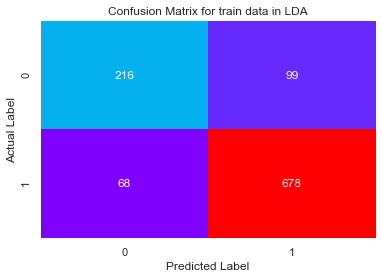

In [136]:
# Get the confusion matrix on the train data
confusion_matrix(ytrain, pred3)
sns.heatmap(confusion_matrix(ytrain, pred3),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for train data in LDA')
plt.show()

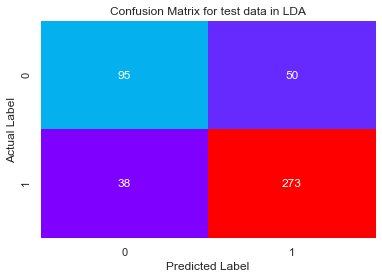

In [137]:
# Get the confusion matrix on the test data
confusion_matrix(ytest, pred4)
sns.heatmap(confusion_matrix(ytest, pred4),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for test data in LDA')
plt.show()

### LDA with SMOTE

In [138]:
ldamodel3 = LinearDiscriminantAnalysis( solver='svd', tol=0.0001)
ldamodel3.fit(X_train_res, Y_train_res)

pred5 = ldamodel3.predict(X_train_res)
print(classification_report(Y_train_res, pred5))
confusion_matrix(Y_train_res, pred5)

# Prediction on the xtest data
pred6 = ldamodel3.predict(xtest)
print(classification_report(ytest, pred6))
confusion_matrix(ytest, pred6)

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       746
           1       0.85      0.84      0.84       746

    accuracy                           0.84      1492
   macro avg       0.84      0.84      0.84      1492
weighted avg       0.84      0.84      0.84      1492

              precision    recall  f1-score   support

           0       0.65      0.76      0.70       145
           1       0.88      0.81      0.84       311

    accuracy                           0.79       456
   macro avg       0.76      0.78      0.77       456
weighted avg       0.80      0.79      0.80       456



array([[110,  35],
       [ 60, 251]], dtype=int64)

In [126]:
#Evaluation metrics for train lda data
lda_metrics=classification_report(Y_train_res, pred5,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_train_f1=round(df.loc["1"][2],2)
lda_train_recall=round(df.loc["1"][1],2)
lda_train_precision=round(df.loc["1"][0],2)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print ('lda_train_f1 ',lda_train_f1)

lda_train_precision  0.85
lda_train_recall  0.84
lda_train_f1  0.84


In [127]:
#Evaluation metrics for test lda data
lda_metrics=classification_report(ytest, pred6,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_test_f1=round(df.loc["1"][2],2)
lda_test_recall=round(df.loc["1"][1],2)
lda_test_precision=round(df.loc["1"][0],2)
print ('lda_test_precision ',lda_test_precision)
print ('lda_test_recall ',lda_test_recall)
print ('lda_test_f1 ',lda_test_f1)

lda_test_precision  0.88
lda_test_recall  0.81
lda_test_f1  0.84


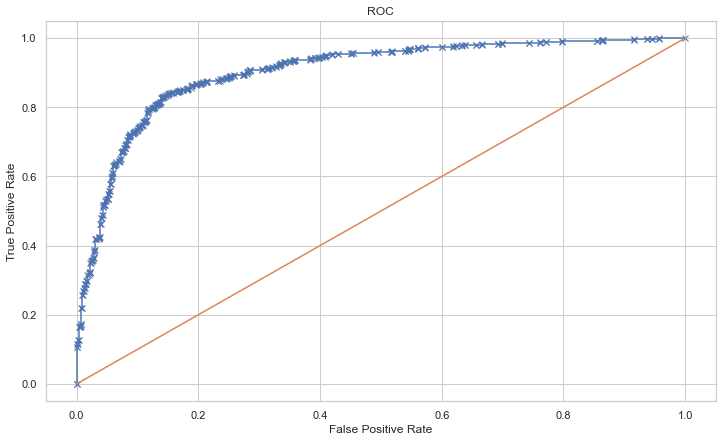

Area under Curve is 0.9020513336543784


In [128]:
#Check for the roc auc score and auc score
lda_fpr, lda_tpr,_=roc_curve( Y_train_res,ldamodel3.predict_proba(X_train_res)[:,1])
plt.figure(figsize=(12,7))
plt.plot(lda_fpr, lda_tpr, marker='x', label='LDA')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
lda_train_auc = roc_auc_score(Y_train_res,ldamodel3.predict_proba(X_train_res,)[:,1])
print('Area under Curve is', lda_train_auc )

### Test Data

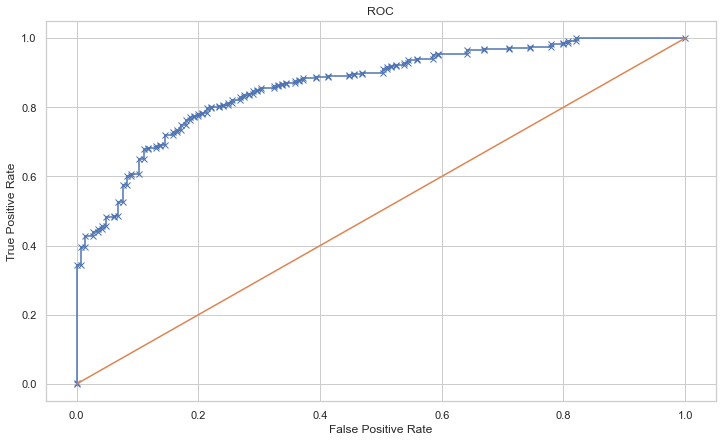

Area under Curve is 0.8639982259674023


In [129]:
#Check for the roc auc score and auc score
lda_fpr, lda_tpr,_=roc_curve(ytest,ldamodel3.predict_proba(xtest)[:,1])
plt.figure(figsize=(12,7))
plt.plot(lda_fpr, lda_tpr, marker='x', label='LDA')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
lda_test_auc = roc_auc_score(ytest,ldamodel3.predict_proba(xtest)[:,1])
print('Area under Curve is', lda_test_auc )

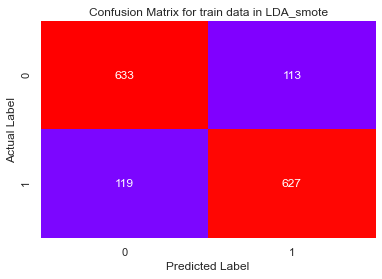

In [130]:
# Get the confusion matrix on the train data
confusion_matrix(Y_train_res, pred5)
sns.heatmap(confusion_matrix(Y_train_res, pred5),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for train data in LDA_smote')
plt.show()

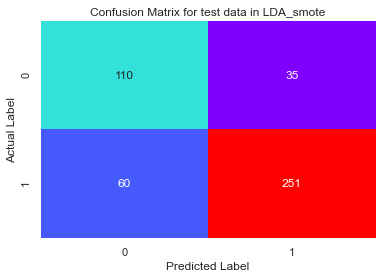

In [131]:
# Get the confusion matrix on the test data
confusion_matrix(ytest, pred6)
sns.heatmap(confusion_matrix(ytest, pred6),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for test data in LDA_smote')
plt.show()

## KNN

In [20]:
KNN_model=KNeighborsClassifier()
KNN_model.fit(xtrain, ytrain)

pred3 = KNN_model.predict(xtrain)
print(classification_report(ytrain, pred3))
confusion_matrix(ytrain, pred3)

# Prediction on the xtest data
pred4 = KNN_model.predict(xtest)
print(classification_report(ytest, pred4))
confusion_matrix(ytest, pred4)

              precision    recall  f1-score   support

           0       0.78      0.75      0.77       320
           1       0.90      0.91      0.90       747

    accuracy                           0.86      1067
   macro avg       0.84      0.83      0.83      1067
weighted avg       0.86      0.86      0.86      1067

              precision    recall  f1-score   support

           0       0.67      0.68      0.67       142
           1       0.85      0.85      0.85       316

    accuracy                           0.80       458
   macro avg       0.76      0.76      0.76       458
weighted avg       0.80      0.80      0.80       458



array([[ 96,  46],
       [ 47, 269]], dtype=int64)

In [21]:
KNN_train_auc = roc_auc_score(ytrain,KNN_model.predict_proba(xtrain)[:,1])
print('Area under Curve is', KNN_train_auc)

Area under Curve is 0.9297481593038822


In [22]:
KNN_test_auc = roc_auc_score(ytest,KNN_model.predict_proba(xtest)[:,1])
print('Area under Curve is', KNN_test_auc)

Area under Curve is 0.8505303975753253


### Tune the model using hyperparameter- Grid search CV

In [140]:
k_range = list(range(1, 31))
weights_1= ['uniform', 'distance']
algorithm_1= ['auto', 'ball_tree', 'kd_tree', 'brute']


# define grid search
grid = dict(n_neighbors=k_range, weights = weights_1, algorithm =  algorithm_1)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=KNN_model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.816074 using {'algorithm': 'brute', 'n_neighbors': 24, 'weights': 'uniform'}
0.748633 (0.031115) with: {'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}
0.748633 (0.031115) with: {'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'distance'}
0.741352 (0.028909) with: {'algorithm': 'auto', 'n_neighbors': 2, 'weights': 'uniform'}
0.743571 (0.033355) with: {'algorithm': 'auto', 'n_neighbors': 2, 'weights': 'distance'}
0.778063 (0.028959) with: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'uniform'}
0.776082 (0.030022) with: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}
0.788387 (0.031916) with: {'algorithm': 'auto', 'n_neighbors': 4, 'weights': 'uniform'}
0.780705 (0.030289) with: {'algorithm': 'auto', 'n_neighbors': 4, 'weights': 'distance'}
0.791254 (0.022898) with: {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}
0.785095 (0.025536) with: {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}
0.789713 (0.026153) with: {'al

**Best: 0.816074 using {'algorithm': 'brute', 'n_neighbors': 24, 'weights': 'uniform'}**


In [141]:
KNN_model2=KNeighborsClassifier(n_neighbors=24, weights='uniform', algorithm='brute', leaf_size = 30)
KNN_model2.fit(xtrain, ytrain)

pred3 = KNN_model2.predict(xtrain)
print(classification_report(ytrain, pred3))
confusion_matrix(ytrain, pred3)

# Prediction on the xtest data
pred4 = KNN_model2.predict(xtest)
print(classification_report(ytest, pred4))
confusion_matrix(ytest, pred4)

              precision    recall  f1-score   support

           0       0.76      0.75      0.75       315
           1       0.89      0.90      0.90       746

    accuracy                           0.85      1061
   macro avg       0.83      0.82      0.83      1061
weighted avg       0.85      0.85      0.85      1061

              precision    recall  f1-score   support

           0       0.69      0.65      0.67       145
           1       0.84      0.86      0.85       311

    accuracy                           0.80       456
   macro avg       0.77      0.76      0.76       456
weighted avg       0.79      0.80      0.79       456



array([[ 94,  51],
       [ 42, 269]], dtype=int64)

### AUC and ROC for the training data

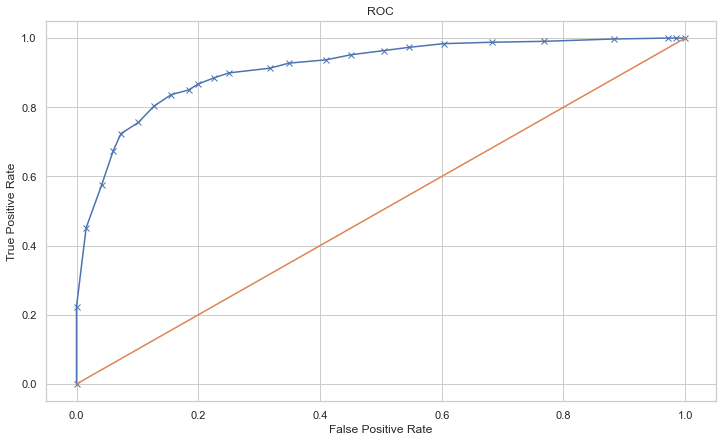

Area under Curve is 0.9125473424401038


In [142]:
#Check for the roc auc score and auc score
knn_train_fpr, knn_train_tpr,_=roc_curve(ytrain,KNN_model2.predict_proba(xtrain)[:,1])
plt.figure(figsize=(12,7))
plt.plot(knn_train_fpr, knn_train_tpr, marker='x', label='KNN')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
knn_train_auc = roc_auc_score(ytrain,KNN_model2.predict_proba(xtrain)[:,1])
print('Area under Curve is', knn_train_auc )

### AUC and ROC for the testing data

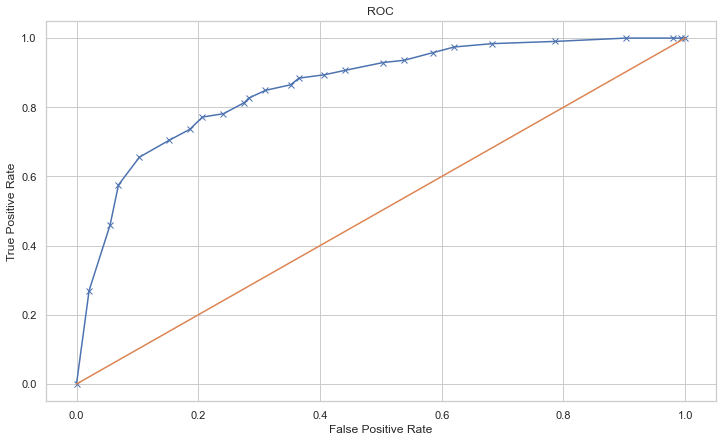

Area under Curve is 0.8596961969176183


In [144]:
#Check for the roc auc score and auc score
knn_test_fpr, knn_test_tpr,_=roc_curve(ytest,KNN_model2.predict_proba(xtest)[:,1])
plt.figure(figsize=(12,7))
plt.plot(knn_test_fpr, knn_test_tpr, marker='x', label='KNN')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
knn_test_auc = roc_auc_score(ytest,KNN_model2.predict_proba(xtest)[:,1])
print('Area under Curve is', knn_test_auc)

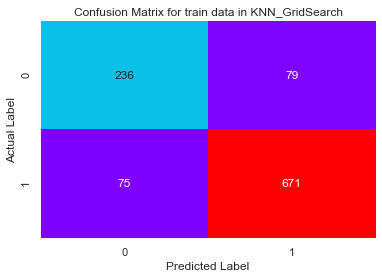

In [145]:
# Get the confusion matrix on the train data
confusion_matrix(ytrain, pred3)
sns.heatmap(confusion_matrix(ytrain, pred3),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for train data in KNN_GridSearch')
plt.show()

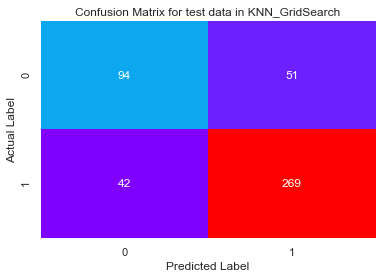

In [146]:
# Get the confusion matrix on the test data
confusion_matrix(ytest, pred4)
sns.heatmap(confusion_matrix(ytest, pred4),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for test data in KNN_GridSearch')
plt.show()

## KNN with SMOTE

In [147]:
KNN_model3=KNeighborsClassifier(n_neighbors=24, weights='uniform', algorithm='brute', leaf_size = 30)
KNN_model3.fit(X_train_res, Y_train_res)

pred5 = KNN_model3.predict(X_train_res)
print(classification_report(Y_train_res, pred5))
confusion_matrix(Y_train_res, pred5)

# Prediction on the xtest data
pred6 = KNN_model3.predict(xtest)
print(classification_report(ytest, pred6))
confusion_matrix(ytest, pred6)

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       746
           1       0.88      0.80      0.84       746

    accuracy                           0.85      1492
   macro avg       0.85      0.85      0.84      1492
weighted avg       0.85      0.85      0.84      1492

              precision    recall  f1-score   support

           0       0.61      0.79      0.69       145
           1       0.89      0.77      0.82       311

    accuracy                           0.77       456
   macro avg       0.75      0.78      0.76       456
weighted avg       0.80      0.77      0.78       456



array([[115,  30],
       [ 73, 238]], dtype=int64)

### AUC and ROC for the training data

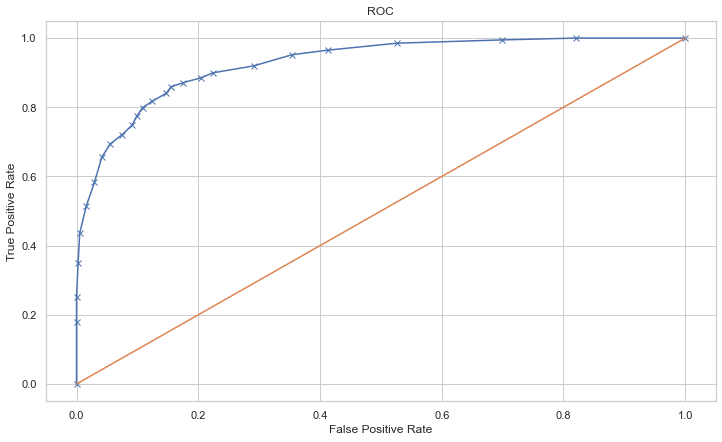

Area under Curve is 0.9278520294115532


In [148]:
#Check for the roc auc score and auc score
knn_train_fpr, knn_train_tpr,_=roc_curve(Y_train_res,KNN_model3.predict_proba(X_train_res)[:,1])
plt.figure(figsize=(12,7))
plt.plot(knn_train_fpr, knn_train_tpr, marker='x', label='KNN_SMOTE_Train')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
knn_train_auc = roc_auc_score(Y_train_res,KNN_model3.predict_proba(X_train_res)[:,1])
print('Area under Curve is', knn_train_auc )

### AUC and ROC for the testing data

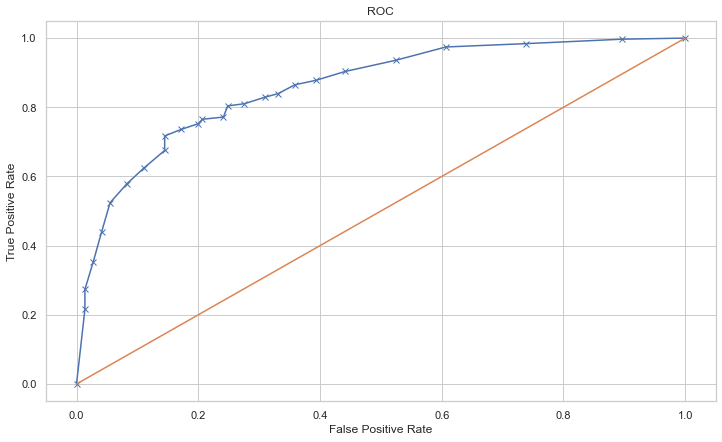

Area under Curve is 0.8580441290608716


In [149]:
#Check for the roc auc score and auc score
knn_test_fpr, knn_test_tpr,_=roc_curve(ytest,KNN_model3.predict_proba(xtest)[:,1])
plt.figure(figsize=(12,7))
plt.plot(knn_test_fpr, knn_test_tpr, marker='x', label='KNN_SMOTE_test')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
knn_test_auc = roc_auc_score(ytest,KNN_model3.predict_proba(xtest)[:,1])
print('Area under Curve is', knn_test_auc)

## Naive Bayes

In [150]:
NB_model=GaussianNB()
NB_model.fit(xtrain, ytrain)

pred3 = NB_model.predict(xtrain)
print(classification_report(ytrain, pred3))
confusion_matrix(ytrain, pred3)

# Prediction on the xtest data
pred4 = NB_model.predict(xtest)
print(classification_report(ytest, pred4))
confusion_matrix(ytest, pred4)

              precision    recall  f1-score   support

           0       0.75      0.71      0.73       315
           1       0.88      0.90      0.89       746

    accuracy                           0.85      1061
   macro avg       0.82      0.81      0.81      1061
weighted avg       0.84      0.85      0.84      1061

              precision    recall  f1-score   support

           0       0.70      0.66      0.68       145
           1       0.84      0.87      0.86       311

    accuracy                           0.80       456
   macro avg       0.77      0.76      0.77       456
weighted avg       0.80      0.80      0.80       456



array([[ 95,  50],
       [ 41, 270]], dtype=int64)

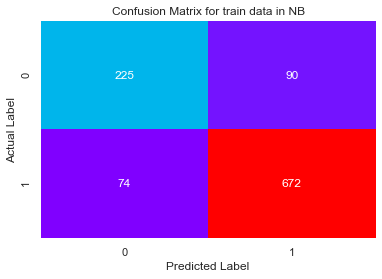

In [151]:
# Get the confusion matrix on the train data
confusion_matrix(ytrain, pred3)
sns.heatmap(confusion_matrix(ytrain, pred3),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for train data in NB')
plt.show()

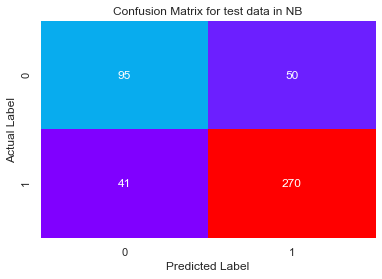

In [153]:
# Get the confusion matrix on the test data
confusion_matrix(ytest, pred4)
sns.heatmap(confusion_matrix(ytest, pred4),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for test data in NB')
plt.show()

### AUC and ROC for the training data

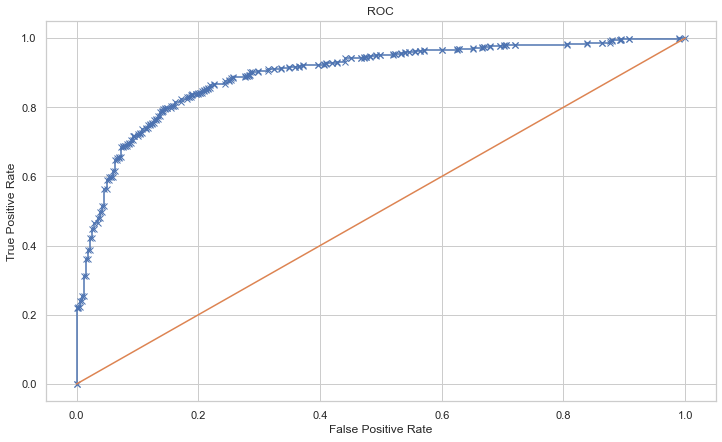

Area under Curve is 0.8945359376994767


In [154]:
#Check for the roc auc score and auc score
nb_train_fpr, nb_train_tpr,_=roc_curve(ytrain,NB_model.predict_proba(xtrain)[:,1])
plt.figure(figsize=(12,7))
plt.plot(nb_train_fpr, nb_train_tpr, marker='x', label='NB_Train')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
nb_train_auc = roc_auc_score(ytrain,NB_model.predict_proba(xtrain)[:,1])
print('Area under Curve is', nb_train_auc )

### AUC and ROC for the testing data

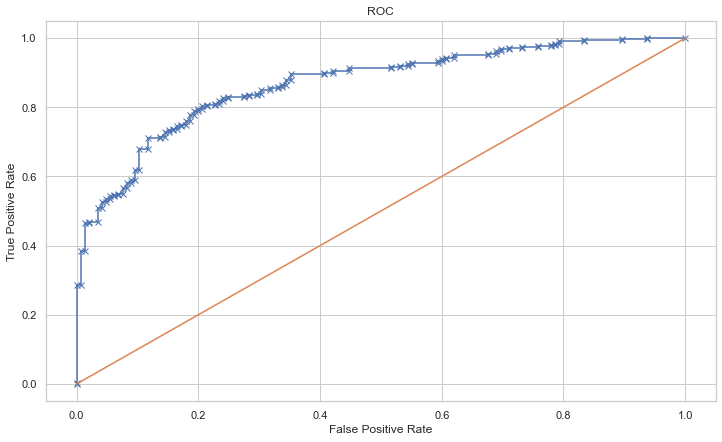

Area under Curve is 0.86790109768267


In [155]:
#Check for the roc auc score and auc score
nb_test_fpr, nb_test_tpr,_=roc_curve(ytest,NB_model.predict_proba(xtest)[:,1])
plt.figure(figsize=(12,7))
plt.plot(nb_test_fpr, nb_test_tpr, marker='x', label='NB_test')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
nb_test_auc = roc_auc_score(ytest,NB_model.predict_proba(xtest)[:,1])
print('Area under Curve is', nb_test_auc)

## Naive Bayes with SMOTE

In [156]:
NB_model2=GaussianNB()
NB_model2.fit(X_train_res, Y_train_res)

pred5 = NB_model2.predict(X_train_res)
print(classification_report(Y_train_res, pred5))
confusion_matrix(Y_train_res, pred5)

# Prediction on the xtest data
pred6 = NB_model2.predict(xtest)
print(classification_report(ytest, pred6))
confusion_matrix(ytest, pred6)

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       746
           1       0.84      0.83      0.83       746

    accuracy                           0.83      1492
   macro avg       0.83      0.83      0.83      1492
weighted avg       0.83      0.83      0.83      1492

              precision    recall  f1-score   support

           0       0.66      0.77      0.71       145
           1       0.88      0.81      0.85       311

    accuracy                           0.80       456
   macro avg       0.77      0.79      0.78       456
weighted avg       0.81      0.80      0.80       456



array([[112,  33],
       [ 58, 253]], dtype=int64)

### AUC and ROC for the training data

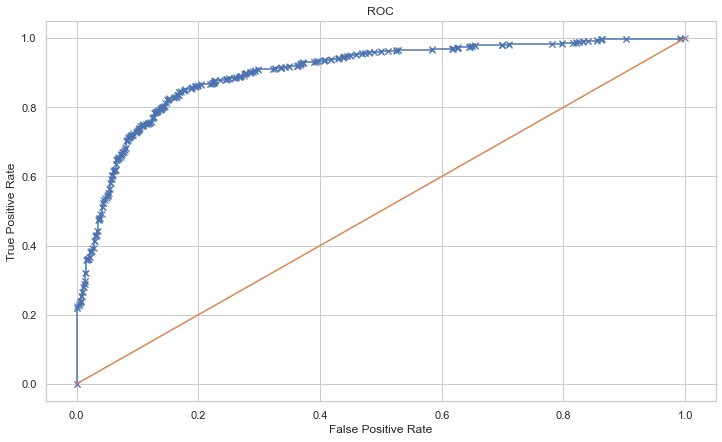

Area under Curve is 0.8997459192547923


In [157]:
#Check for the roc auc score and auc score
nb_train_fpr, nb_train_tpr,_=roc_curve(Y_train_res,NB_model2.predict_proba(X_train_res)[:,1])
plt.figure(figsize=(12,7))
plt.plot(nb_train_fpr, nb_train_tpr, marker='x', label='NB_SMOTE_Train')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
nb_train_auc = roc_auc_score(Y_train_res,NB_model2.predict_proba(X_train_res)[:,1])
print('Area under Curve is', nb_train_auc )

### AUC and ROC for the testing data

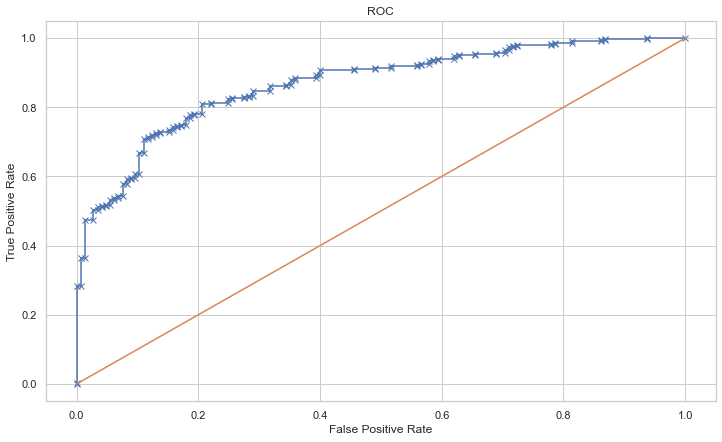

Area under Curve is 0.8678123960527774


In [158]:
#Check for the roc auc score and auc score
nb_test_fpr, nb_test_tpr,_=roc_curve(ytest,NB_model2.predict_proba(xtest)[:,1])
plt.figure(figsize=(12,7))
plt.plot(nb_test_fpr, nb_test_tpr, marker='x', label='NB_SMOTE_test')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
nb_test_auc = roc_auc_score(ytest,NB_model2.predict_proba(xtest)[:,1])
print('Area under Curve is', nb_test_auc)

## Bagging Classifier

In [71]:
bgcl_model = BaggingClassifier(n_estimators=50,random_state=1)
bgcl_model.fit(xtrain, ytrain)

pred3 = bgcl_model.predict(xtrain)
print(classification_report(ytrain, pred3))
print(confusion_matrix(ytrain, pred3))

# Prediction on the xtest data
pred4 = bgcl_model.predict(xtest)
print(classification_report(ytest, pred4))
confusion_matrix(ytest, pred4)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       323
           1       1.00      1.00      1.00       738

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061

[[322   1]
 [  0 738]]
              precision    recall  f1-score   support

           0       0.69      0.61      0.64       137
           1       0.84      0.88      0.86       319

    accuracy                           0.80       456
   macro avg       0.76      0.74      0.75       456
weighted avg       0.79      0.80      0.79       456



array([[ 83,  54],
       [ 38, 281]], dtype=int64)

In [162]:
Bag_train_auc = roc_auc_score(ytrain,bgcl_model.predict_proba(xtrain)[:,1])
print('Area under Curve is', Bag_train_auc)

Area under Curve is 1.0


In [163]:
Bag_test_auc = roc_auc_score(ytest,bgcl_model.predict_proba(xtest)[:,1])
print('Area under Curve is', Bag_test_auc)

Area under Curve is 0.859807073954984


### Tune the model using hyperparameter- Grid search CV

In [72]:

# define grid search
params = {'base_estimator': [None,RandomForestClassifier()],
          'n_estimators': [20,50,100],
          'max_samples': [0.5, 0.7, 1.0 ],
          'max_features': [0.5, 0.7, 1.0],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False]}


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=bgcl_model, param_grid=params, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.835873 using {'base_estimator': RandomForestClassifier(), 'bootstrap': True, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 50}
0.806640 (0.022398) with: {'base_estimator': None, 'bootstrap': True, 'bootstrap_features': True, 'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 20}
0.797637 (0.019230) with: {'base_estimator': None, 'bootstrap': True, 'bootstrap_features': True, 'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 50}
0.796975 (0.019251) with: {'base_estimator': None, 'bootstrap': True, 'bootstrap_features': True, 'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 100}
0.798074 (0.022623) with: {'base_estimator': None, 'bootstrap': True, 'bootstrap_features': True, 'max_features': 0.5, 'max_samples': 0.7, 'n_estimators': 20}
0.795223 (0.023452) with: {'base_estimator': None, 'bootstrap': True, 'bootstrap_features': True, 'max_features': 0.5, 'max_samples': 0.7, 'n_estimators': 50}
0.801820 (0.022464) with: {'b

**Best: 0.835873 using {'base_estimator': RandomForestClassifier(), 'bootstrap': True, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 50}**

In [73]:
bgcl_model2 = BaggingClassifier(base_estimator = RandomForestClassifier(),  n_estimators=50,
                               max_samples=0.5, max_features=1.0, bootstrap=True, 
                               bootstrap_features=False)
bgcl_model2.fit(xtrain, ytrain)

pred3 = bgcl_model2.predict(xtrain)
print(classification_report(ytrain, pred3))
print(confusion_matrix(ytrain, pred3))

# Prediction on the xtest data
pred4 = bgcl_model2.predict(xtest)
print(classification_report(ytest, pred4))
confusion_matrix(ytest, pred4)

              precision    recall  f1-score   support

           0       0.89      0.83      0.86       323
           1       0.93      0.96      0.94       738

    accuracy                           0.92      1061
   macro avg       0.91      0.89      0.90      1061
weighted avg       0.92      0.92      0.92      1061

[[268  55]
 [ 33 705]]
              precision    recall  f1-score   support

           0       0.76      0.61      0.68       137
           1       0.85      0.92      0.88       319

    accuracy                           0.83       456
   macro avg       0.81      0.77      0.78       456
weighted avg       0.82      0.83      0.82       456



array([[ 84,  53],
       [ 26, 293]], dtype=int64)

In [74]:
Bag_train_gs_auc = roc_auc_score(ytrain,bgcl_model2.predict_proba(xtrain)[:,1])
print('Area under Curve of Bag_train is ', Bag_train_gs_auc)
Bag_test_gs_auc = roc_auc_score(ytest,bgcl_model2.predict_proba(xtest)[:,1])
print('Area under Curve of Bag_test is', Bag_test_gs_auc)

Area under Curve of Bag_train is  0.9796055777895241
Area under Curve of Bag_test is 0.8915863899503467


### AUC and ROC for the training data

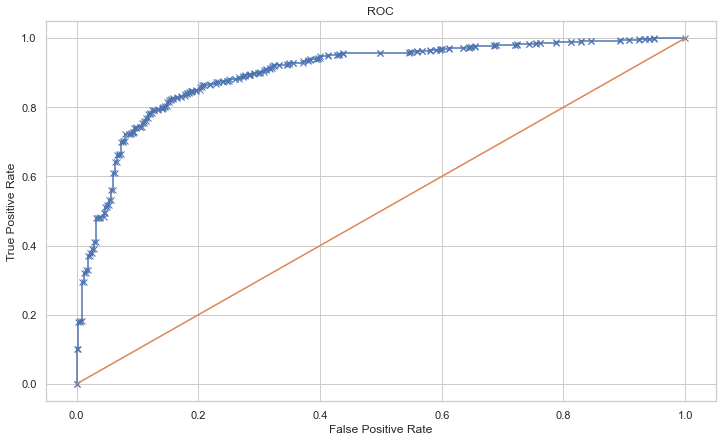

Area under Curve is 0.8986595174262733


In [178]:
#Check for the roc auc score and auc score
bag_train_fpr, bag_train_tpr,_=roc_curve(ytrain,bgcl_model2.predict_proba(xtrain)[:,1])
plt.figure(figsize=(12,7))
plt.plot(bag_train_fpr, bag_train_tpr, marker='x', label='Bagging_Train')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
bag_train_auc = roc_auc_score(ytrain,bgcl_model2.predict_proba(xtrain)[:,1])
print('Area under Curve is', bag_train_auc )

### AUC and ROC for the testing data

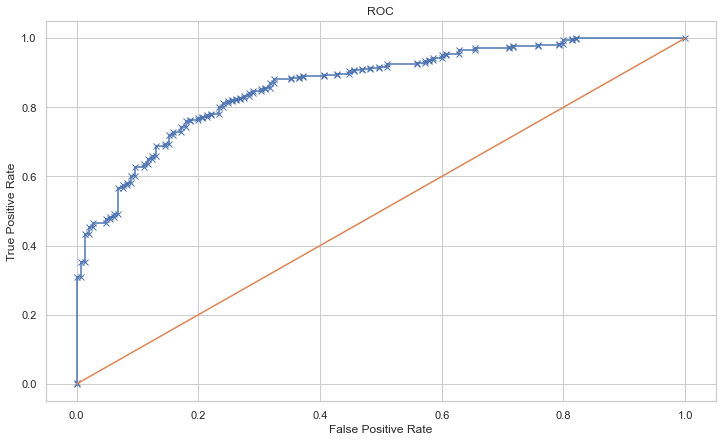

Area under Curve is 0.8646634881915956


In [179]:
#Check for the roc auc score and auc score
bag_test_fpr, bag_test_tpr,_=roc_curve(ytest,bgcl_model2.predict_proba(xtest)[:,1])
plt.figure(figsize=(12,7))
plt.plot(bag_test_fpr, bag_test_tpr, marker='x', label='Bagging _test')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
bag_test_auc = roc_auc_score(ytest,bgcl_model2.predict_proba(xtest)[:,1])
print('Area under Curve is', bag_test_auc)

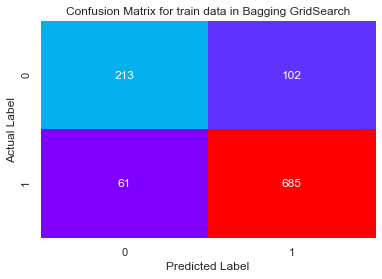

In [180]:
# Get the confusion matrix on the train data
confusion_matrix(ytrain, pred3)
sns.heatmap(confusion_matrix(ytrain, pred3),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for train data in Bagging GridSearch')
plt.show()

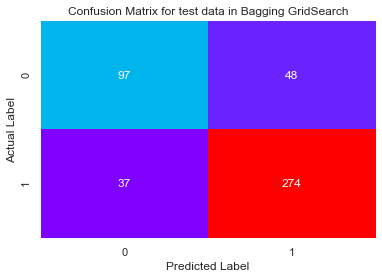

In [181]:
# Get the confusion matrix on the test data
confusion_matrix(ytest, pred4)
sns.heatmap(confusion_matrix(ytest, pred4),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for test data in Bagging GridSearch')
plt.show()

## Bagging with SMOTE

In [75]:
bgcl_model3 = BaggingClassifier(base_estimator = RandomForestClassifier(),  n_estimators=50,
                               max_samples=0.5, max_features=1.0, bootstrap=True, 
                               bootstrap_features=False)
bgcl_model3.fit(X_train_res, Y_train_res)

pred5 = bgcl_model3.predict(X_train_res)
print(classification_report(Y_train_res, pred5))
print(confusion_matrix(Y_train_res, pred5))

# Prediction on the xtest data
pred6 = bgcl_model3.predict(xtest)
print(classification_report(ytest, pred6))
confusion_matrix(ytest, pred6)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       738
           1       0.95      0.93      0.94       738

    accuracy                           0.94      1476
   macro avg       0.94      0.94      0.94      1476
weighted avg       0.94      0.94      0.94      1476

[[700  38]
 [ 53 685]]
              precision    recall  f1-score   support

           0       0.71      0.73      0.72       137
           1       0.88      0.87      0.88       319

    accuracy                           0.83       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456



array([[100,  37],
       [ 40, 279]], dtype=int64)

In [76]:
Bag_train_smote_auc = roc_auc_score(Y_train_res,bgcl_model3.predict_proba(X_train_res)[:,1])
print('Area under Curve of Bag_train is ', Bag_train_smote_auc)
Bag_test_smote_auc = roc_auc_score(ytest,bgcl_model3.predict_proba(xtest)[:,1])
print('Area under Curve of Bag_test is', Bag_test_smote_auc)

Area under Curve of Bag_train is  0.9891240883953555
Area under Curve of Bag_test is 0.8900418735555912


**2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.**

## Boosting Classifier

## Ada Boost Classifier

### Tune the model using hyperparameter- Grid search CV

## Boosting Classifier

## Ada Boost Classifier

In [16]:
ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(xtrain, ytrain)

pred3 = ADB_model.predict(xtrain)
print(classification_report(ytrain, pred3))
print(confusion_matrix(ytrain, pred3))

# Prediction on the xtest data
pred4 = ADB_model.predict(xtest)
print(classification_report(ytest, pred4))
confusion_matrix(ytest, pred4)

              precision    recall  f1-score   support

           0       0.79      0.72      0.75       328
           1       0.88      0.92      0.90       733

    accuracy                           0.85      1061
   macro avg       0.83      0.82      0.82      1061
weighted avg       0.85      0.85      0.85      1061

[[235  93]
 [ 62 671]]
              precision    recall  f1-score   support

           0       0.69      0.75      0.72       132
           1       0.89      0.86      0.88       324

    accuracy                           0.83       456
   macro avg       0.79      0.81      0.80       456
weighted avg       0.84      0.83      0.83       456



array([[ 99,  33],
       [ 44, 280]], dtype=int64)

In [17]:
ADB_train_auc = roc_auc_score(ytrain,ADB_model.predict_proba(xtrain)[:,1])
print('Area under Curve for ADA Boost_train is', ADB_train_auc)
ADB_test_auc = roc_auc_score(ytest,ADB_model.predict_proba(xtest)[:,1])
print('Area under Curve for ADA Boost_test is', ADB_test_auc)

Area under Curve for ADA Boost_train is 0.9148525105646692
Area under Curve for ADA Boost_test is 0.8751519827908716


### Tune the model using hyperparameter- Grid search CV

In [ ]:
# define grid search

params = {
            'base_estimator':[None, DecisionTreeClassifier(), SVC(), LogisticRegression()],
            'n_estimators': np.arange(100, 350, 100),
            'learning_rate': [0.5, 1.0, 2.0, ]
         }
#ada_boost_classif_grid = GridSearchCV(AdaBoostClassifier(random_state=1, algorithm='SAMME'), param_grid=params, n_jobs=-1, cv=3, verbose=5)
#ada_boost_classif_grid.fit(X_train,Y_train)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=AdaBoostClassifier(random_state=1, algorithm='SAMME'), param_grid=params, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

**Best: 0.834096 using {'base_estimator': None, 'learning_rate' : 1.0, 'n_estimators': 100}**

In [18]:
ADB_model2 = AdaBoostClassifier(base_estimator = None, learning_rate = 1.0, n_estimators=100)
ADB_model2.fit(xtrain, ytrain)

pred3 = ADB_model2.predict(xtrain)
print(classification_report(ytrain, pred3))
print(confusion_matrix(ytrain, pred3))

# Prediction on the xtest data
pred4 = ADB_model2.predict(xtest)
print(classification_report(ytest, pred4))
confusion_matrix(ytest, pred4)

              precision    recall  f1-score   support

           0       0.79      0.72      0.75       328
           1       0.88      0.92      0.90       733

    accuracy                           0.85      1061
   macro avg       0.83      0.82      0.82      1061
weighted avg       0.85      0.85      0.85      1061

[[235  93]
 [ 62 671]]
              precision    recall  f1-score   support

           0       0.69      0.75      0.72       132
           1       0.89      0.86      0.88       324

    accuracy                           0.83       456
   macro avg       0.79      0.81      0.80       456
weighted avg       0.84      0.83      0.83       456



array([[ 99,  33],
       [ 44, 280]], dtype=int64)

In [19]:
ADA_train_gs_auc = roc_auc_score(ytrain,ADB_model2.predict_proba(xtrain)[:,1])
print('Area under Curve of ADA_train is ', ADA_train_gs_auc)
ADA_test_gs_auc = roc_auc_score(ytest,ADB_model2.predict_proba(xtest)[:,1])
print('Area under Curve of ADA_test is', ADA_test_gs_auc)

Area under Curve of ADA_train is  0.9148525105646692
Area under Curve of ADA_test is 0.8751519827908716


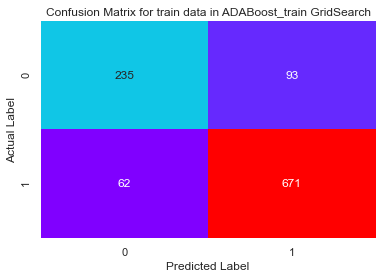

In [20]:
# Get the confusion matrix on the train data
confusion_matrix(ytrain, pred3)
sns.heatmap(confusion_matrix(ytrain, pred3),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for train data in ADABoost_train GridSearch')
plt.show()

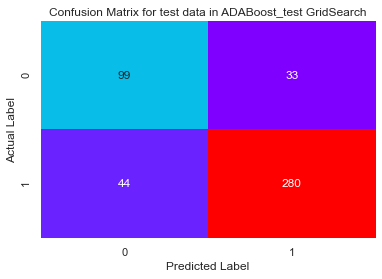

In [21]:
# Get the confusion matrix on the test data
confusion_matrix(ytest, pred4)
sns.heatmap(confusion_matrix(ytest, pred4),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for test data in ADABoost_test GridSearch')
plt.show()

### ADA Boost with SMOTE

In [22]:
ADB_model3 = AdaBoostClassifier(base_estimator = None, learning_rate = 1.0, n_estimators=100)
ADB_model3.fit(X_train_res, Y_train_res)

pred5 = ADB_model3.predict(X_train_res)
print(classification_report(Y_train_res, pred5))
print(confusion_matrix(Y_train_res, pred5))

# Prediction on the xtest data
pred6 = ADB_model3.predict(xtest)
print(classification_report(ytest, pred6))
confusion_matrix(ytest, pred6)

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       733
           1       0.89      0.86      0.88       733

    accuracy                           0.88      1466
   macro avg       0.88      0.88      0.88      1466
weighted avg       0.88      0.88      0.88      1466

[[654  79]
 [ 99 634]]
              precision    recall  f1-score   support

           0       0.64      0.82      0.72       132
           1       0.92      0.81      0.86       324

    accuracy                           0.81       456
   macro avg       0.78      0.81      0.79       456
weighted avg       0.83      0.81      0.82       456



array([[108,  24],
       [ 62, 262]], dtype=int64)

In [23]:
ADA_train_SMOTE_auc = roc_auc_score(Y_train_res,ADB_model3.predict_proba(X_train_res)[:,1])
print('Area under Curve of ADA_train is ', ADA_train_SMOTE_auc)
ADA_test_SMOTE_auc = roc_auc_score(ytest,ADB_model3.predict_proba(xtest)[:,1])
print('Area under Curve of ADA_test is', ADA_test_SMOTE_auc)

Area under Curve of ADA_train is  0.9452761921424039
Area under Curve of ADA_test is 0.8749181631126075


### Training Data

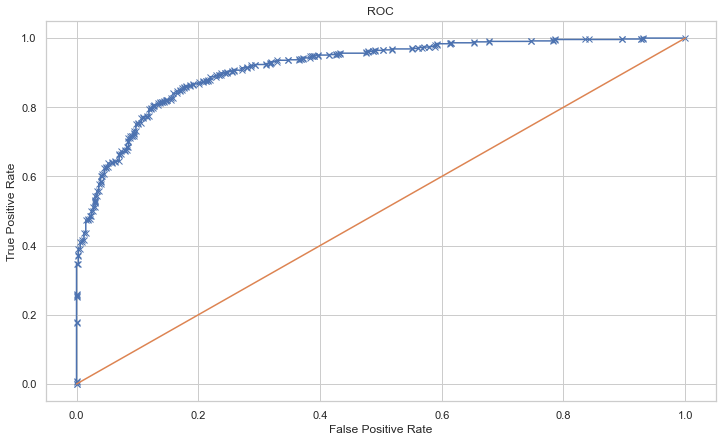

Area under Curve is 0.9148525105646692


In [24]:
#Check for the roc auc score and auc score
ADA_gs_train_fpr,ADA_gs_train_tpr,_=roc_curve(ytrain,ADB_model2.predict_proba(xtrain)[:,1])
plt.figure(figsize=(12,7))
plt.plot(ADA_gs_train_fpr, ADA_gs_train_tpr, marker='x', label='ADABoost_GRID_train')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
ADA_gs_train_auc = roc_auc_score(ytrain,ADB_model2.predict_proba(xtrain)[:,1])
print('Area under Curve is', ADA_gs_train_auc )

### Test Data

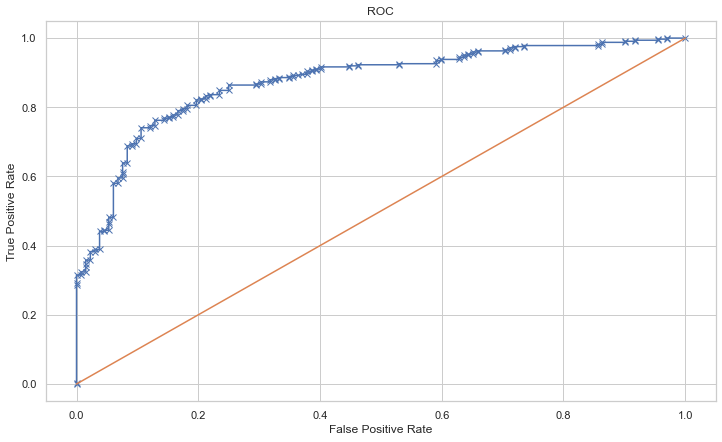

Area under Curve is 0.8751519827908716


In [25]:
#Check for the roc auc score and auc score
ADA_gs_test_fpr, ADA_gs_test_tpr,_=roc_curve(ytest,ADB_model2.predict_proba(xtest)[:,1])
plt.figure(figsize=(12,7))
plt.plot(ADA_gs_test_fpr, ADA_gs_test_tpr, marker='x', label='ADABoost_GRID_test')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
ADA_gs_test_auc = roc_auc_score(ytest,ADB_model2.predict_proba(xtest)[:,1])
print('Area under Curve is', ADA_gs_test_auc )

### Evaluation metrices for test data

## Random Forest Classifier

In [17]:
RF_model = RandomForestClassifier()
RF_model.fit(xtrain, ytrain)

pred3 = RF_model.predict(xtrain)
print(classification_report(ytrain, pred3))
print(confusion_matrix(ytrain, pred3))

# Prediction on the xtest data
pred4 = RF_model.predict(xtest)
print(classification_report(ytest, pred4))
confusion_matrix(ytest, pred4)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       318
           1       1.00      1.00      1.00       743

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061

[[318   0]
 [  0 743]]
              precision    recall  f1-score   support

           0       0.75      0.65      0.69       142
           1       0.85      0.90      0.87       314

    accuracy                           0.82       456
   macro avg       0.80      0.77      0.78       456
weighted avg       0.82      0.82      0.82       456



array([[ 92,  50],
       [ 31, 283]], dtype=int64)

In [18]:
RF_train_auc = roc_auc_score(ytrain,RF_model.predict_proba(xtrain)[:,1])
print('Area under Curve for RF_train is', RF_train_auc)
RF_test_auc = roc_auc_score(ytest,RF_model.predict_proba(xtest)[:,1])
print('Area under Curve for RF_test is', RF_test_auc)

Area under Curve for RF_train is 1.0
Area under Curve for RF_test is 0.8836458239885171


### Tune the model using hyperparameter- Grid search CV

In [ ]:
# define grid search

params = {
            'criterion': ['gini', 'entropy'],
            'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['auto', 'sqrt', 'log2', None],            
            'n_estimators': [100, 200, 400, 500, 600, 800]
         }
#ada_boost_classif_grid = GridSearchCV(AdaBoostClassifier(random_state=1, algorithm='SAMME'), param_grid=params, n_jobs=-1, cv=3, verbose=5)
#ada_boost_classif_grid.fit(X_train,Y_train)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator= RandomForestClassifier(), param_grid=params, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

###### **Best: 0.834096 using { 'criterion' : 'gini', 'random_state' : 1, 'max_depth' : 15, 'n_estimators' : 450, 'min_samples_split' : 5, 'min_samples_leaf ' : 4, 'max_features' : 'sqrt'}**

In [30]:
RF_model2 = RandomForestClassifier(criterion = 'gini', random_state = 1, max_depth = 15, n_estimators = 450, 
                                    min_samples_split = 5, min_samples_leaf = 4, max_features = 'sqrt')
RF_model2.fit(xtrain, ytrain)

pred3 = RF_model2.predict(xtrain)
print(classification_report(ytrain, pred3))
print(confusion_matrix(ytrain, pred3))

# Prediction on the xtest data
pred4 = RF_model2.predict(xtest)
print(classification_report(ytest, pred4))
confusion_matrix(ytest, pred4)

              precision    recall  f1-score   support

           0       0.85      0.75      0.79       318
           1       0.90      0.94      0.92       743

    accuracy                           0.88      1061
   macro avg       0.87      0.85      0.86      1061
weighted avg       0.88      0.88      0.88      1061

[[238  80]
 [ 43 700]]
              precision    recall  f1-score   support

           0       0.81      0.63      0.71       142
           1       0.85      0.93      0.89       314

    accuracy                           0.84       456
   macro avg       0.83      0.78      0.80       456
weighted avg       0.84      0.84      0.83       456



array([[ 90,  52],
       [ 21, 293]], dtype=int64)

In [175]:
RF_train_gs_auc = roc_auc_score(ytrain,RF_model2.predict_proba(xtrain)[:,1])
print('Area under Curve of RF_train is ', RF_train_gs_auc)
RF_test_gs_auc = roc_auc_score(ytest,RF_model2.predict_proba(xtest)[:,1])
print('Area under Curve of RF_test is', RF_test_gs_auc)

Area under Curve of Bag_train is  0.8986595174262733
Area under Curve of Bag_test is 0.8646634881915956


### Random Forest with SMOTE

In [37]:
RF_model3 = RandomForestClassifier(criterion = 'gini', random_state = 1, max_depth = 15, n_estimators = 450, 
                                    min_samples_split = 5, min_samples_leaf = 4, max_features = 'sqrt')
RF_model3.fit(X_train_res, Y_train_res)

pred5 = RF_model3.predict(X_train_res)
print(classification_report(Y_train_res, pred5))
print(confusion_matrix(Y_train_res, pred5))

# Prediction on the xtest data
pred6 = RF_model3.predict(xtest)
print(classification_report(ytest, pred6))
confusion_matrix(ytest, pred6)

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       743
           1       0.93      0.91      0.92       743

    accuracy                           0.92      1486
   macro avg       0.92      0.92      0.92      1486
weighted avg       0.92      0.92      0.92      1486

[[690  53]
 [ 65 678]]
              precision    recall  f1-score   support

           0       0.73      0.77      0.75       142
           1       0.90      0.87      0.88       314

    accuracy                           0.84       456
   macro avg       0.81      0.82      0.82       456
weighted avg       0.84      0.84      0.84       456



array([[110,  32],
       [ 41, 273]], dtype=int64)

In [38]:
RF_train_sm_auc = roc_auc_score(Y_train_res,RF_model3.predict_proba(X_train_res)[:,1])
print('Area under Curve of RF_train is ', RF_train_sm_auc)
RF_test_sm_auc = roc_auc_score(ytest,RF_model3.predict_proba(xtest)[:,1])
print('Area under Curve of RF_test is', RF_test_sm_auc)

Area under Curve of RF_train is  0.9790236011658385
Area under Curve of RF_test is 0.891203911366287


### Training Data

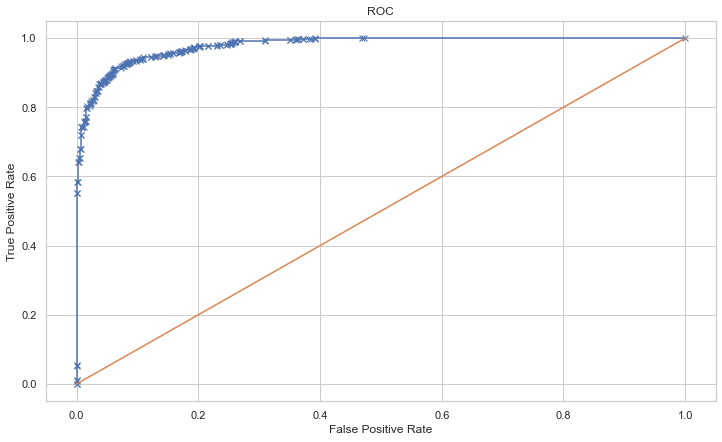

Area under Curve is 0.9790236011658385


In [41]:
#Check for the roc auc score and auc score
RF_SM_train_fpr,RF_SM_train_tpr,_=roc_curve(Y_train_res,RF_model3.predict_proba(X_train_res)[:,1])
plt.figure(figsize=(12,7))
plt.plot(RF_SM_train_fpr, RF_SM_train_tpr, marker='x', label='RF_SM_train')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
RF_SM__train_auc = roc_auc_score(Y_train_res,RF_model3.predict_proba(X_train_res)[:,1])
print('Area under Curve is', RF_SM__train_auc )

### Test Data

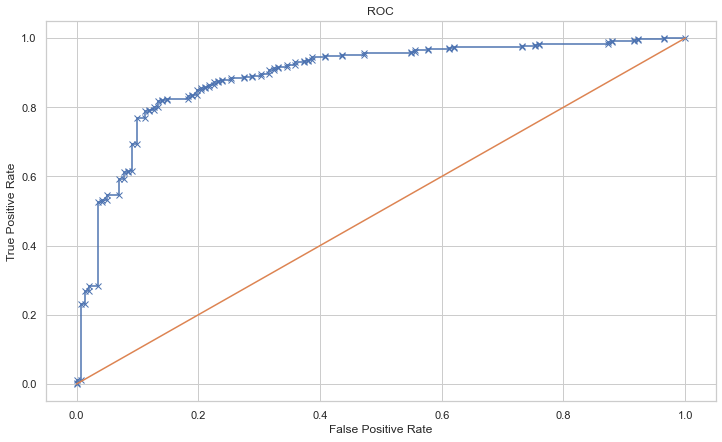

Area under Curve is 0.891203911366287


In [42]:
#Check for the roc auc score and auc score
RF_SM_test_fpr, RF_SM_test_tpr,_=roc_curve(ytest,RF_model3.predict_proba(xtest)[:,1])
plt.figure(figsize=(12,7))
plt.plot(RF_SM_test_fpr, RF_SM_test_tpr, marker='x', label='RF_SM_test')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
RF_SM_test_auc = roc_auc_score(ytest,RF_model3.predict_proba(xtest)[:,1])
print('Area under Curve is', RF_SM_test_auc )

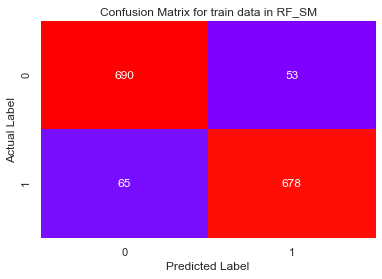

In [43]:
# Get the confusion matrix on the train data
confusion_matrix(Y_train_res, pred5)
sns.heatmap(confusion_matrix(Y_train_res, pred5),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for train data in RF_SM')
plt.show()

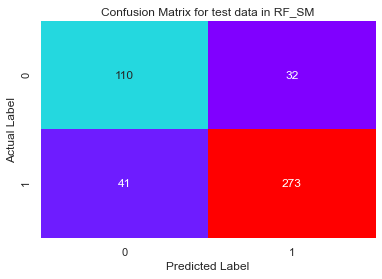

In [44]:
# Get the confusion matrix on the test data
confusion_matrix(ytest, pred6)
sns.heatmap(confusion_matrix(ytest, pred6),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for test data in RF_SM')
plt.show()

2.4 Inference: Basis on these predictions, what are the insights and recommendations.
Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.

## Gradient Boost Classifier

In [16]:
GB_model = GradientBoostingClassifier(n_estimators=100,random_state=1)
GB_model.fit(xtrain, ytrain)

pred3 = GB_model.predict(xtrain)
print(classification_report(ytrain, pred3))
print(confusion_matrix(ytrain, pred3))

# Prediction on the xtest data
pred4 = GB_model.predict(xtest)
print(classification_report(ytest, pred4))
confusion_matrix(ytest, pred4)

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       317
           1       0.91      0.93      0.92       744

    accuracy                           0.89      1061
   macro avg       0.87      0.86      0.86      1061
weighted avg       0.89      0.89      0.89      1061

[[250  67]
 [ 52 692]]
              precision    recall  f1-score   support

           0       0.74      0.69      0.71       143
           1       0.86      0.89      0.88       313

    accuracy                           0.83       456
   macro avg       0.80      0.79      0.80       456
weighted avg       0.82      0.83      0.83       456



array([[ 99,  44],
       [ 35, 278]], dtype=int64)

In [17]:
GB_train_auc = roc_auc_score(ytrain,GB_model.predict_proba(xtrain)[:,1])
print('Area under Curve for Gradient_Boost_train is', GB_train_auc)
GB_test_auc = roc_auc_score(ytest,GB_model.predict_proba(xtest)[:,1])
print('Area under Curve for Gradient_Boost_test is', GB_test_auc)

Area under Curve for Gradient_Boost_train is 0.9471820833757335
Area under Curve for Gradient_Boost_test is 0.8997073214325609


In [ ]:
# define grid search

params = {
            'loss':['deviance', 'exponential'],
            'n_estimators': np.arange(100, 350, 100),
            'learning_rate': [0.5, 1.0, 2.0, ],
            'min_samples_split': np.linspace(0.1, 0.5, 12),
            'min_samples_leaf': np.linspace(0.1, 0.5, 12),
            'max_depth':[3,5,8],
            'max_features':['log2','sqrt'],
            'criterion': ['friedman_mse',  'mae', 'squared_error', 'mse'],
            'subsample':[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
         }
#ada_boost_classif_grid = GridSearchCV(AdaBoostClassifier(random_state=1, algorithm='SAMME'), param_grid=params, n_jobs=-1, cv=3, verbose=5)
#ada_boost_classif_grid.fit(X_train,Y_train)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=params, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

###### **Best: 0.834096 using { 'learning_rate' : 0.5,'min_samples_split' : 500, 'min_samples_leaf' : 50,'criterion' : 'squared_error',max_depth=9,''max_features' :'sqrt', 'subsample' : 0.8, 'random_state' : 1, 'n_estimators' : 100}**

In [35]:
GB_model2 = GradientBoostingClassifier(learning_rate=0.5, min_samples_split=500,min_samples_leaf=50,
                                       criterion = 'squared_error',max_depth=9,max_features='sqrt',
                                       subsample=0.8,random_state=1, n_estimators=100)
GB_model2.fit(xtrain, ytrain)

pred3 = GB_model2.predict(xtrain)
print(classification_report(ytrain, pred3))
print(confusion_matrix(ytrain, pred3))

# Prediction on the xtest data
pred4 = GB_model2.predict(xtest)
print(classification_report(ytest, pred4)) 
confusion_matrix(ytest, pred4)

              precision    recall  f1-score   support

           0       0.78      0.72      0.75       317
           1       0.88      0.91      0.90       744

    accuracy                           0.85      1061
   macro avg       0.83      0.82      0.82      1061
weighted avg       0.85      0.85      0.85      1061

[[228  89]
 [ 66 678]]
              precision    recall  f1-score   support

           0       0.75      0.69      0.72       143
           1       0.86      0.90      0.88       313

    accuracy                           0.83       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



array([[ 98,  45],
       [ 32, 281]], dtype=int64)

In [36]:
GB_train_gs_auc = roc_auc_score(ytrain,GB_model2.predict_proba(xtrain)[:,1])
print('Area under Curve of GB_train is ', GB_train_gs_auc)
GB_test_gs_auc = roc_auc_score(ytest,GB_model2.predict_proba(xtest)[:,1])
print('Area under Curve of GB_test is', GB_test_gs_auc)

Area under Curve of GB_train is  0.9178241918523795
Area under Curve of GB_test is 0.8875533412274627


### Training Data

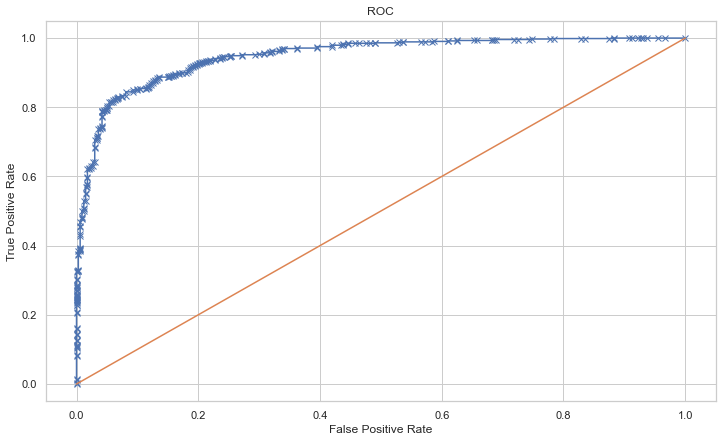

Area under Curve is 0.9481484074492007


In [17]:
#Check for the roc auc score and auc score
ADA_gs_train_fpr,ADA_gs_train_tpr,_=roc_curve(ytrain,GB_model.predict_proba(xtrain)[:,1])
plt.figure(figsize=(12,7))
plt.plot(ADA_gs_train_fpr, ADA_gs_train_tpr, marker='x', label='ADABoost_GRID_train')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
ADA_gs_train_auc = roc_auc_score(ytrain,GB_model.predict_proba(xtrain)[:,1])
print('Area under Curve is', ADA_gs_train_auc )

### Test Data

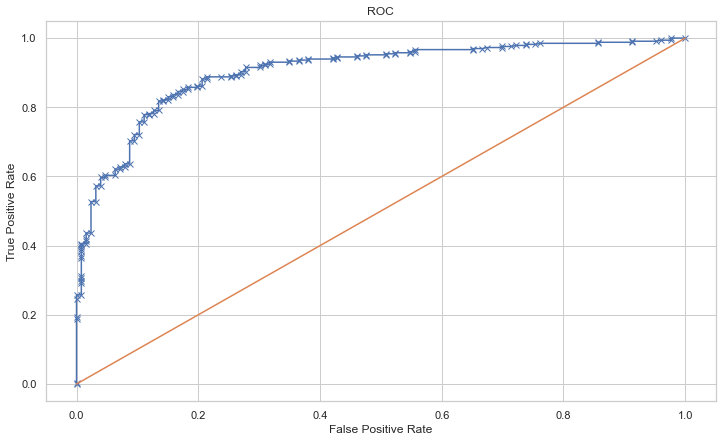

Area under Curve is 0.9036315536315535


In [18]:
#Check for the roc auc score and auc score
ADA_gs_test_fpr, ADA_gs_test_tpr,_=roc_curve(ytest,GB_model.predict_proba(xtest)[:,1])
plt.figure(figsize=(12,7))
plt.plot(ADA_gs_test_fpr, ADA_gs_test_tpr, marker='x', label='ADABoost_GRID_test')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
ADA_gs_test_auc = roc_auc_score(ytest,GB_model.predict_proba(xtest)[:,1])
print('Area under Curve is', ADA_gs_test_auc )

In [33]:
GB_model3 = GradientBoostingClassifier(learning_rate=0.5, min_samples_split=500,min_samples_leaf=50,
                                       criterion = 'squared_error',max_depth=9,max_features='sqrt',
                                       subsample=0.8,random_state=1, n_estimators=100)
GB_model3.fit(X_train_res, Y_train_res)

pred5 = GB_model3.predict(X_train_res)
print(classification_report(Y_train_res, pred5))
print(confusion_matrix(Y_train_res, pred5))

# Prediction on the xtest data
pred6 = GB_model3.predict(xtest)
print(classification_report(ytest, pred6))
confusion_matrix(ytest, pred6)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       744
           1       0.91      0.90      0.91       744

    accuracy                           0.91      1488
   macro avg       0.91      0.91      0.91      1488
weighted avg       0.91      0.91      0.91      1488

[[679  65]
 [ 71 673]]
              precision    recall  f1-score   support

           0       0.73      0.76      0.74       143
           1       0.89      0.88      0.88       313

    accuracy                           0.84       456
   macro avg       0.81      0.82      0.81       456
weighted avg       0.84      0.84      0.84       456



array([[108,  35],
       [ 39, 274]], dtype=int64)

In [34]:
GB_train_gs_auc = roc_auc_score(Y_train_res,GB_model3.predict_proba(X_train_res)[:,1])
print('Area under Curve of GB_train is ', GB_train_gs_auc)
GB_test_gs_auc = roc_auc_score(ytest,GB_model3.predict_proba(xtest)[:,1])
print('Area under Curve of GB_test is', GB_test_gs_auc)

Area under Curve of GB_train is  0.9696361212278877
Area under Curve of GB_test is 0.8894970843852632


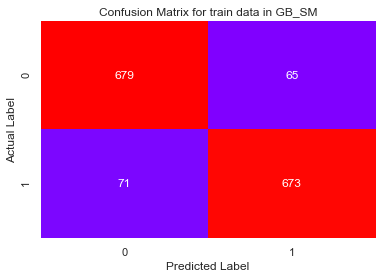

In [37]:
# Get the confusion matrix on the train data
confusion_matrix(Y_train_res, pred5)
sns.heatmap(confusion_matrix(Y_train_res, pred5),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for train data in GB_SM')
plt.show()

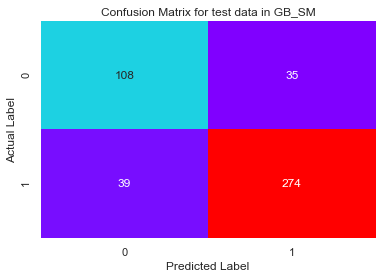

In [38]:
# Get the confusion matrix on the test data
confusion_matrix(ytest, pred6)
sns.heatmap(confusion_matrix(ytest, pred6),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for test data in GB_SM')
plt.show()

### Training Data

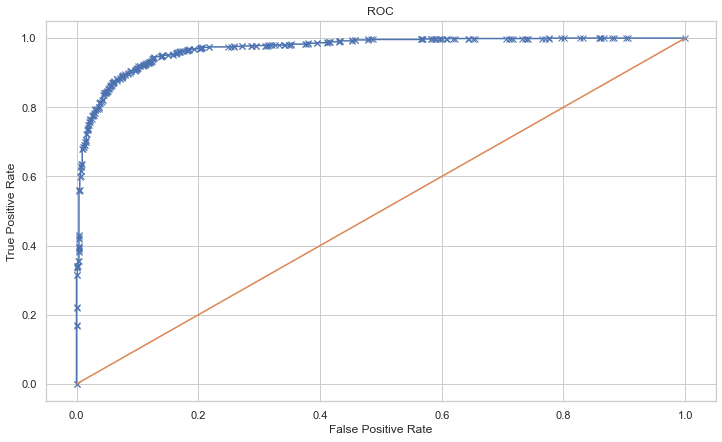

Area under Curve is 0.9696361212278877


In [39]:
#Check for the roc auc score and auc score
GB_gs_train_fpr,GB_gs_train_tpr,_=roc_curve(Y_train_res,GB_model3.predict_proba(X_train_res)[:,1])
plt.figure(figsize=(12,7))
plt.plot(GB_gs_train_fpr, GB_gs_train_tpr, marker='x', label='GBBoost_GRID_train')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
GB_gs_train_auc = roc_auc_score(Y_train_res,GB_model3.predict_proba(X_train_res)[:,1])
print('Area under Curve is', GB_gs_train_auc )

### Test Data

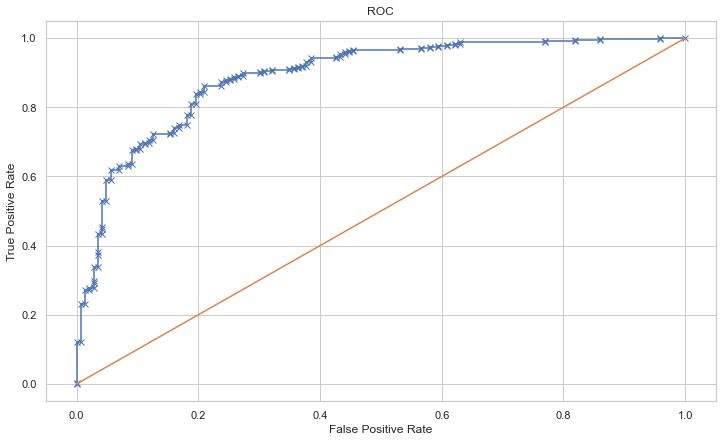

Area under Curve is 0.8894970843852632


In [40]:
#Check for the roc auc score and auc score
GB_gs_test_fpr, GB_gs_test_tpr,_=roc_curve(ytest,GB_model3.predict_proba(xtest)[:,1])
plt.figure(figsize=(12,7))
plt.plot(GB_gs_test_fpr, GB_gs_test_tpr, marker='x', label='ADABoost_GRID_test')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
GB_gs_test_auc = roc_auc_score(ytest,GB_model3.predict_proba(xtest)[:,1])
print('Area under Curve is', GB_gs_test_auc )